In [2]:
# Parameters for automated execution in CI
# browser = "chrome"
# start_date = 0
# end_date = 0


In [3]:
# import papermill as pm

# def execute_notebook(browser, start_date=None, end_date=None):
#     pm.execute_notebook(
#         'notebooks/performance_analysis.ipynb',
#         f'notebooks/output/performance_analysis_{browser}_{start_date}_{end_date}.ipynb',
#         parameters=dict(
#             browser=browser,
#             start_date=start_date,
#             end_date=end_date
#         )
#     )

# if __name__ == "__main__":
#     execute_notebook("chrome")
#     execute_notebook("firefox")


In [4]:
# dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [7]:
# Define the root data directory
DATA_ROOT = "../data"

# Define browsers to analyze
BROWSERS = ["chrome", "firefox"]

In [8]:
def load_csv_files(browser, start_date=None, end_date=None):
    browser_dir = os.path.join(DATA_ROOT, browser)
    all_runs = []
    
    for run in os.listdir(browser_dir):
        run_path = os.path.join(browser_dir, run, "performance_results.csv")
        if os.path.exists(run_path):
            # Extract date from directory name
            date_str = run.split('_v')[0]
            run_date = datetime.strptime(date_str, "%Y-%m-%d")
            
            if start_date and run_date < start_date:
                continue
            if end_date and run_date > end_date:
                continue
            
            df = pd.read_csv(run_path)
            df['test_date'] = run_date
            df['browser'] = browser
            df['version'] = run.split('_v')[1]
            all_runs.append(df)
    
    if all_runs:
        return pd.concat(all_runs, ignore_index=True)
    else:
        return pd.DataFrame()


In [9]:
# Example: Load all Chrome data
chrome_data = load_csv_files("chrome")

# Example: Load Firefox data within a date range
start = datetime(2024, 4, 1)
end = datetime(2024, 4, 30)
firefox_data = load_csv_files("firefox", start_date=start, end_date=end)


In [10]:
def clean_data(df):
    # Handle missing values, e.g., median imputation
    df.fillna(df.median(), inplace=True)
    return df

chrome_data = clean_data(chrome_data)
firefox_data = clean_data(firefox_data)


In [12]:
# Example: Correlation Heatmap for Chrome
# plt.figure(figsize=(10,8))
# sns.heatmap(chrome_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Correlation Heatmap - Chrome")
# plt.show()

# # Example: Line Plot for TTFB over Time
# plt.figure(figsize=(12,6))
# sns.lineplot(data=chrome_data, x='test_date', y='ttfb_ms', hue='version')
# plt.title("TTFB Over Time - Chrome")
# plt.xlabel("Test Date")
# plt.ylabel("Time To First Byte (ms)")
# plt.show()


In [17]:
# import ipywidgets as widgets
# from IPython.display import display

# browser_select = widgets.Dropdown(options=BROWSERS, description='Browser:')
# start_date_picker = widgets.DatePicker(description='Start Date')
# end_date_picker = widgets.DatePicker(description='End Date')
# analyze_button = widgets.Button(description='Analyze')

# def on_analyze_button_clicked(b):
#     browser = browser_select.value
#     start_date = start_date_picker.value
#     end_date = end_date_picker.value
#     data = load_csv_files(browser, start_date, end_date)
#     if data.empty:
#         print("No data available for the selected criteria.")
#         return
#     data = clean_data(data)
    
#     plt.figure(figsize=(10,8))
#     sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
#     plt.title(f"Correlation Heatmap - {browser.capitalize()}")
#     plt.show()
    
#     plt.figure(figsize=(12,6))
#     sns.lineplot(data=data, x='test_date', y='ttfb_ms', hue='version')
#     plt.title(f"TTFB Over Time - {browser.capitalize()}")
#     plt.xlabel("Test Date")
#     plt.ylabel("Time To First Byte (ms)")
#     plt.show()

# analyze_button.on_click(on_analyze_button_clicked)

# display(browser_select, start_date_picker, end_date_picker, analyze_button)


## Loading the Data

We will load the performance metrics data from both Chrome and Firefox and combine them into a single DataFrame for analysis.


In [20]:
# Enter timestamp for test run to view
# for example, in ./android-performance/data/chrome/results
# there are directories named after the timestamp given to them
# when the tests were run - the example timestamp is the "0" dirs
# i.e. ../chrome/results/0/performance_metrics.csv
timestamp = "0"

# Define the base directory (parent directory of the notebook)
base_dir = os.path.abspath('..')  # Adjust as needed
# Paths to the data files
chrome_csv = os.path.join(base_dir, 'data', 'chrome', timestamp, 'results', 'performance_metrics.csv')

firefox_csv = os.path.join(base_dir, 'data', 'firefox', timestamp, 'results', 'performance_metrics.csv')
combined_csv = os.path.join(base_dir, 'data', 'combined_results', timestamp, 'performance_metrics.csv')

# Choose whether to use the combined CSV or individual browser CSVs
use_combined_csv = False  # Set to True if you want to use the combined CSV

if use_combined_csv:
    # Load combined data
    df = pd.read_csv(combined_csv)
else:
    # Load data from Chrome and Firefox CSV files
    df_chrome = pd.read_csv(chrome_csv)
    df_firefox = pd.read_csv(firefox_csv)

    # Add a 'browser' column if not already present
    if 'browser' not in df_chrome.columns:
        df_chrome['browser'] = 'Chrome'
    if 'browser' not in df_firefox.columns:
        df_firefox['browser'] = 'Firefox'

    # Combine DataFrames
    df = pd.concat([df_chrome, df_firefox], ignore_index=True)

# Display the first few rows
df.head()


,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,77.4,2.1,309.1,2024-10-13,46,247,310,619,405.1,405.1,616.200000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,99.6,63.2,984.5,2024-10-13,645,675,1409,2393,1725.9,1759.3,1483.145455,736021,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,204.0,173.2,787.7,2024-10-13,262,548,819,1607,1386.0,1386.0,75.036364,479385,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,561.0,26.6,1303.3,2024-10-13,258,955,1345,2648,1817.6,1817.6,216.150000,4356,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.4,1.7,301.6,2024-10-13,7,256,274,576,431.9,431.9,574.600000,0,Chrome,SUCCESS


In [21]:
# Import necessary libraries (if not already imported)
import pandas as pd
import os

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # Remove row limit
print("Combined DataFrame:")
print(df)
pd.reset_option('display.max_rows')  # Reset to default


Combined DataFrame:
                 website  dns_lookup_time_ms  tcp_handshake_time_ms  \
0   googletagmanager.com                 0.0                    0.0   
1            youtube.com                 0.0                    0.0   
2           facebook.com                 0.0                    0.0   
3    ajax.googleapis.com                 0.0                    0.0   
4   fonts.googleapis.com                 0.0                    0.0   
5            twitter.com                 0.0                    0.0   
6             google.com                 0.0                    0.0   
7           linkedin.com                62.3                  160.9   
8          instagram.com                 0.0                    0.0   
9                s.w.org                66.0                  166.7   
10  googletagmanager.com                60.0                  118.0   
11           youtube.com                 5.0                  151.0   
12          facebook.com                37.0             

## Data Inspection

Let's inspect the DataFrame to understand the structure and check for any issues.


In [22]:
# Get DataFrame information
df.info()
# Check for missing values
df.isnull().sum()
# Get descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   website                              20 non-null     object 
 1   dns_lookup_time_ms                   20 non-null     float64
 2   tcp_handshake_time_ms                20 non-null     float64
 3   ssl_time_ms                          20 non-null     float64
 4   ttfb_ms                              20 non-null     float64
 5   content_download_time_ms             20 non-null     float64
 6   total_network_time_ms                20 non-null     float64
 7   measurement_date                     20 non-null     object 
 8   adjusted_dom_parsing_time_ms         20 non-null     int64  
 9   adjusted_rendering_time_ms           20 non-null     int64  
 10  adjusted_browser_processing_time_ms  20 non-null     int64  
 11  total_page_load_time_ms           

,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,20.000000,20.000000,2.000000e+01
mean,16.815000,43.780000,35.665000,159.265000,34.045000,646.550000,327.950000,1311.750000,1659.950000,2321.100000,997.640000,953.590000,668.765952,4.555213e+05
std,26.151789,69.302515,56.972129,124.765233,51.778948,300.748948,324.419396,1818.424213,1910.221824,1938.336642,551.705278,533.392521,774.877052,5.740394e+05
min,0.000000,0.000000,0.000000,65.000000,0.000000,274.000000,3.000000,183.000000,264.000000,538.000000,282.000000,282.000000,1.833333,0.000000e+00
25%,0.000000,0.000000,0.000000,86.175000,0.000000,354.775000,29.500000,461.750000,754.000000,1486.750000,494.925000,425.925000,199.993278,2.421000e+03
50%,0.000000,0.000000,0.000000,100.950000,3.050000,616.950000,257.000000,731.000000,1107.000000,1724.500000,964.600000,864.100000,286.691379,2.731345e+05
75%,40.250000,120.500000,91.750000,208.500000,46.700000,822.050000,541.000000,1061.000000,1509.500000,2456.750000,1368.175000,1367.250000,749.816667,5.954785e+05
max,66.000000,166.700000,151.000000,561.000000,173.200000,1303.300000,931.000000,6894.000000,6988.000000,7581.000000,1817.600000,1817.600000,2909.100000,1.791140e+06


In [23]:
# Import necessary libraries (if not already imported)
import pandas as pd
import os

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # Remove row limit
print("Combined DataFrame:")
print(df)
pd.reset_option('display.max_rows')  # Reset to default


Combined DataFrame:
                 website  dns_lookup_time_ms  tcp_handshake_time_ms  \
0   googletagmanager.com                 0.0                    0.0   
1            youtube.com                 0.0                    0.0   
2           facebook.com                 0.0                    0.0   
3    ajax.googleapis.com                 0.0                    0.0   
4   fonts.googleapis.com                 0.0                    0.0   
5            twitter.com                 0.0                    0.0   
6             google.com                 0.0                    0.0   
7           linkedin.com                62.3                  160.9   
8          instagram.com                 0.0                    0.0   
9                s.w.org                66.0                  166.7   
10  googletagmanager.com                60.0                  118.0   
11           youtube.com                 5.0                  151.0   
12          facebook.com                37.0             

## Loading Historical Data

We will load the aggregated historical performance metrics to analyze trends over time.


In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# Define the base directory (parent directory of the notebook)
base_dir = os.path.abspath('..')

# Path to the historical master CSV
historical_csv = os.path.join(base_dir, 'data', 'historical', 'historical_performance_metrics.csv')

# Check if the master CSV exists
if not os.path.isfile(historical_csv):
    print(f"Historical CSV file not found at {historical_csv}. Please ensure data collection scripts have run at least once.")
else:
    # Load historical data
    df_historical = pd.read_csv(historical_csv)

    # Display the first few rows
    df_historical.head()


## Data Cleaning and Preprocessing

We will handle missing values and ensure that data types are appropriate for analysis.


In [25]:
# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'total_transfer_size_bytes',
]

# Impute missing values with median for each numeric column
for col in numeric_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median_value}")



Filled missing values in 'total_page_load_time_ms' with median value 1724.5
Filled missing values in 'ttfb_ms' with median value 100.95000004768372
Filled missing values in 'content_download_time_ms' with median value 3.050000011920929
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 257.0
Filled missing values in 'adjusted_rendering_time_ms' with median value 731.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 1107.0
Filled missing values in 'first_paint_ms' with median value 964.5999999642372
Filled missing values in 'first_contentful_paint_ms' with median value 864.0999999642372
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5


/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/4218983113.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/4218983113.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [26]:
# Compute descriptive statistics grouped by browser
description = df.groupby('browser')[numeric_columns].describe()
print("Descriptive statistics by browser:")
print(description)



Descriptive statistics by browser:
        total_page_load_time_ms                                               \
                          count    mean          std    min      25%     50%   
browser                                                                        
Chrome                     10.0  2331.8  2003.556438  576.0  1412.75  1823.5   
Firefox                    10.0  2310.4  1979.208439  538.0  1565.25  1724.5   

                         ttfb_ms          ... first_contentful_paint_ms  \
             75%     max   count    mean  ...                       75%   
browser                                   ...                             
Chrome   2584.25  7581.0    10.0  171.33  ...                  1368.175   
Firefox  2339.75  7481.0    10.0  147.20  ...                  1355.750   

                total_transfer_size_bytes                                \
            max                     count      mean            std  min   
browser                               

In [27]:
from IPython.display import display

# Display the entire DataFrame
display(df)


,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,77.4,2.1,309.1,2024-10-13,46,247,310,619,405.1,405.1,616.200000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,99.6,63.2,984.5,2024-10-13,645,675,1409,2393,1725.9,1759.3,1483.145455,736021,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,204.0,173.2,787.7,2024-10-13,262,548,819,1607,1386.0,1386.0,75.036364,479385,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,561.0,26.6,1303.3,2024-10-13,258,955,1345,2648,1817.6,1817.6,216.150000,4356,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.4,1.7,301.6,2024-10-13,7,256,274,576,431.9,431.9,574.600000,0,Chrome,SUCCESS
5,twitter.com,0.0,0.0,0.0,89.1,81.8,285.5,2024-10-13,880,1744,2625,2911,282.0,282.0,2909.100000,0,Chrome,SUCCESS
6,google.com,0.0,0.0,0.0,159.5,105.7,903.5,2024-10-13,76,1057,1137,2040,937.2,937.2,232.200000,552495,Chrome,SUCCESS
7,linkedin.com,62.3,160.9,118.0,251.2,41.2,794.9,2024-10-13,31,527,559,1354,1314.7,1314.7,6.776923,135131,Chrome,SUCCESS
8,instagram.com,0.0,0.0,0.0,102.3,136.9,592.9,2024-10-13,931,6042,6988,7581,684.0,684.0,328.072414,1791140,Chrome,SUCCESS
9,s.w.org,66.0,166.7,119.3,96.8,11.5,641.0,2024-10-13,492,455,948,1589,992.0,992.0,189.802381,1336894,Chrome,SUCCESS


## Inspecting Historical Data

Let's examine the structure and content of the historical data.


In [28]:
# Get DataFrame information
df_historical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   website                              60 non-null     object 
 1   dns_lookup_time_ms                   60 non-null     float64
 2   tcp_handshake_time_ms                60 non-null     float64
 3   ssl_time_ms                          60 non-null     float64
 4   ttfb_ms                              60 non-null     float64
 5   content_download_time_ms             60 non-null     float64
 6   total_network_time_ms                60 non-null     float64
 7   measurement_date                     60 non-null     object 
 8   adjusted_dom_parsing_time_ms         60 non-null     int64  
 9   adjusted_rendering_time_ms           60 non-null     int64  
 10  adjusted_browser_processing_time_ms  60 non-null     int64  
 11  total_page_load_time_ms           

In [29]:
# Check for missing values
df_historical.isnull().sum()


website                                 0
dns_lookup_time_ms                      0
tcp_handshake_time_ms                   0
ssl_time_ms                             0
ttfb_ms                                 0
content_download_time_ms                0
total_network_time_ms                   0
measurement_date                        0
adjusted_dom_parsing_time_ms            0
adjusted_rendering_time_ms              0
adjusted_browser_processing_time_ms     0
total_page_load_time_ms                 0
first_paint_ms                         21
first_contentful_paint_ms               1
average_resource_processing_time_ms     1
total_transfer_size_bytes               0
browser                                 0
status                                  0
dtype: int64

## Data Cleaning and Preprocessing

We'll handle missing values and ensure that all numeric columns are correctly typed.


In [30]:
# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
]

# Convert columns to numeric types (if not already)
for col in numeric_columns:
    df_historical[col] = pd.to_numeric(df_historical[col], errors='coerce')

# Impute missing values with median
for col in numeric_columns:
    median = df_historical[col].median()
    df_historical[col].fillna(median, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median}")

# Verify that there are no missing values in numeric columns
print("\nMissing values after imputation:")
print(df_historical[numeric_columns].isnull().sum())


Filled missing values in 'total_page_load_time_ms' with median value 1692.5
Filled missing values in 'ttfb_ms' with median value 111.19999998807907
Filled missing values in 'content_download_time_ms' with median value 18.100000023841858
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 254.5
Filled missing values in 'adjusted_rendering_time_ms' with median value 642.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 961.0
Filled missing values in 'first_paint_ms' with median value 937.1999999284744
Filled missing values in 'first_contentful_paint_ms' with median value 837.3000000715256
Filled missing values in 'average_resource_processing_time_ms' with median value 288.7772727283564
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5

Missing values after imputation:
total_page_load_time_ms                0
ttfb_ms                                0
content_download_time_ms               0
adjusted_dom_pa

/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/3689604570.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_historical[col].fillna(median, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/3689604570.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## Loading and Preparing Historical Data for Correlation Heatmaps

We need to create our network and dom groups to check for correlations between them in order to verify as much as possible we have correctly isolated these datasets given our currently methodology for gathering and calculating these values.
This is especially important to verify our network events have as close to a zero correlation as possible as we are attempting to remove all network noise from the actual DOM events.
Further, we want to verify our network events related to outside network conditions are not creating noise within the current browser specific protocols that handle network events which we are trying to isolate like `dns_lookup_time`, `tcp_handshake`, `ssl_time`, and `ttfb`.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the master historical CSV
df = pd.read_csv('../data/historical/historical_performance_metrics.csv')

# Convert 'measurement_date' to datetime
df['measurement_date'] = pd.to_datetime(df['measurement_date'])

# Define network and DOM metrics
network_metrics = [
    'dns_lookup_time_ms',
    'tcp_handshake_time_ms',
    'ssl_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'total_network_time_ms',
    'total_transfer_size_bytes'
]

dom_metrics = [
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'total_page_load_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms'
]


## Data Cleaning: Handling Zero Measurements

`Zero measurements` can distor correlation analyses and need to be addressed to mitigate their effect on our data.

In [32]:
# Identify zero measurements in network and DOM metrics
zero_network = df[network_metrics] == 0
zero_dom = df[dom_metrics] == 0

# Display count of zeros per metric
print("Zero Measurements in Network Metrics:")
print(zero_network.sum())
print("\nZero Measurements in DOM Metrics:")
print(zero_dom.sum())


Zero Measurements in Network Metrics:
dns_lookup_time_ms           40
tcp_handshake_time_ms        45
ssl_time_ms                  45
ttfb_ms                       0
content_download_time_ms     12
total_network_time_ms         0
total_transfer_size_bytes    16
dtype: int64

Zero Measurements in DOM Metrics:
adjusted_dom_parsing_time_ms           1
adjusted_rendering_time_ms             1
adjusted_browser_processing_time_ms    0
total_page_load_time_ms                0
first_paint_ms                         0
first_contentful_paint_ms              0
average_resource_processing_time_ms    0
dtype: int64


### Handle Zeros: Impute Zeros with Median Values

Given our current `Zero values` represent an incomplete implementation for gathering some of our measurement that intermittently show up in our data, like `dns_lookup_time` that currently doesn't handle noise in the data that is introduced by `DNS Caching` and how a `tcp_handshake` for one website visit is sometimes reused for the next website visit by the `Websocket Connection`.

These will later be addressed and so no `data imputation` is required.

In [33]:
df_cleaned = df.copy()

# Define numeric columns
numeric_columns = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
    'dns_lookup_time_ms',
    'tcp_handshake_time_ms',
    'ssl_time_ms',
    'total_transfer_size_bytes'
]

# Convert columns to numeric types (if not already)
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Impute missing values with median
for col in numeric_columns:
    median = df_cleaned[col].median()
    df_cleaned[col].fillna(median, inplace=True)
    print(f"Filled missing values in '{col}' with median value {median}")

# Verify that there are no missing values in numeric columns
print("\nMissing values after imputation:")
print(df_historical[numeric_columns].isnull().sum())
# Impute zeros with the median of each metric
# for metric in network_metrics + dom_metrics:
#     median = df_cleaned[metric].median()
#     df_cleaned[metric] = df_cleaned[metric].replace(0, median)

# for metric in network_metrics + dom_metrics:
#     median = df_cleaned[metric].median()
#     df_cleaned[metric] = df_cleaned[metric].replace(nan, median)

display(df_cleaned)

Filled missing values in 'total_page_load_time_ms' with median value 1692.5
Filled missing values in 'ttfb_ms' with median value 111.19999998807907
Filled missing values in 'content_download_time_ms' with median value 18.100000023841858
Filled missing values in 'adjusted_dom_parsing_time_ms' with median value 254.5
Filled missing values in 'adjusted_rendering_time_ms' with median value 642.0
Filled missing values in 'adjusted_browser_processing_time_ms' with median value 961.0
Filled missing values in 'first_paint_ms' with median value 937.1999999284744
Filled missing values in 'first_contentful_paint_ms' with median value 837.3000000715256
Filled missing values in 'average_resource_processing_time_ms' with median value 288.7772727283564
Filled missing values in 'total_transfer_size_bytes' with median value 273134.5
Filled missing values in 'dns_lookup_time_ms' with median value 0.0
Filled missing values in 'tcp_handshake_time_ms' with median value 0.0
Filled missing values in 'ssl_tim

/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/503084824.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median, inplace=True)
/var/folders/gp/4nycy86977j4jy86lc1svfyr0000gn/T/ipykernel_74969/503084824.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,73.6,2.6,272.9,2024-10-13,36,286,336,609,368.8,368.8,607.000000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,123.1,77.4,1101.9,2024-10-13,695,691,1466,2568,1857.9,1891.3,1549.730233,736034,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,304.3,33.2,775.8,2024-10-13,605,314,924,1699,1482.6,1482.6,92.424324,340584,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,227.7,28.3,262.8,2024-10-13,84,433,665,928,899.6,899.6,81.725000,112922,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.2,3.0,269.8,2024-10-13,23,288,318,587,397.8,397.8,585.900000,0,Chrome,SUCCESS
5,twitter.com,0.0,0.0,0.0,107.9,64.8,301.2,2024-10-13,806,877,1684,1985,306.6,306.6,1428.029787,0,Chrome,SUCCESS
6,google.com,0.0,0.0,0.0,144.4,154.6,952.2,2024-10-13,75,893,970,1922,975.6,975.6,288.777273,544679,Chrome,SUCCESS
7,linkedin.com,0.0,0.0,0.0,105.0,39.9,530.8,2024-10-13,23,0,28,559,937.2,837.3,288.777273,0,Chrome,SUCCESS
8,instagram.com,0.0,0.0,0.0,114.4,141.7,606.1,2024-10-13,909,5891,6823,7429,716.4,716.4,274.792308,1757883,Chrome,SUCCESS
9,s.w.org,101.7,170.7,108.8,84.1,29.8,687.2,2024-10-13,676,423,1100,1788,1088.8,1088.8,239.328571,1336894,Chrome,SUCCESS


## Calculating Correlation Matrices

### 1. Inter-Category Correlation Heatmap (Network vs. DOM)

This heatmap will help verify if network metrics are indeed isolated from DOM metrics.

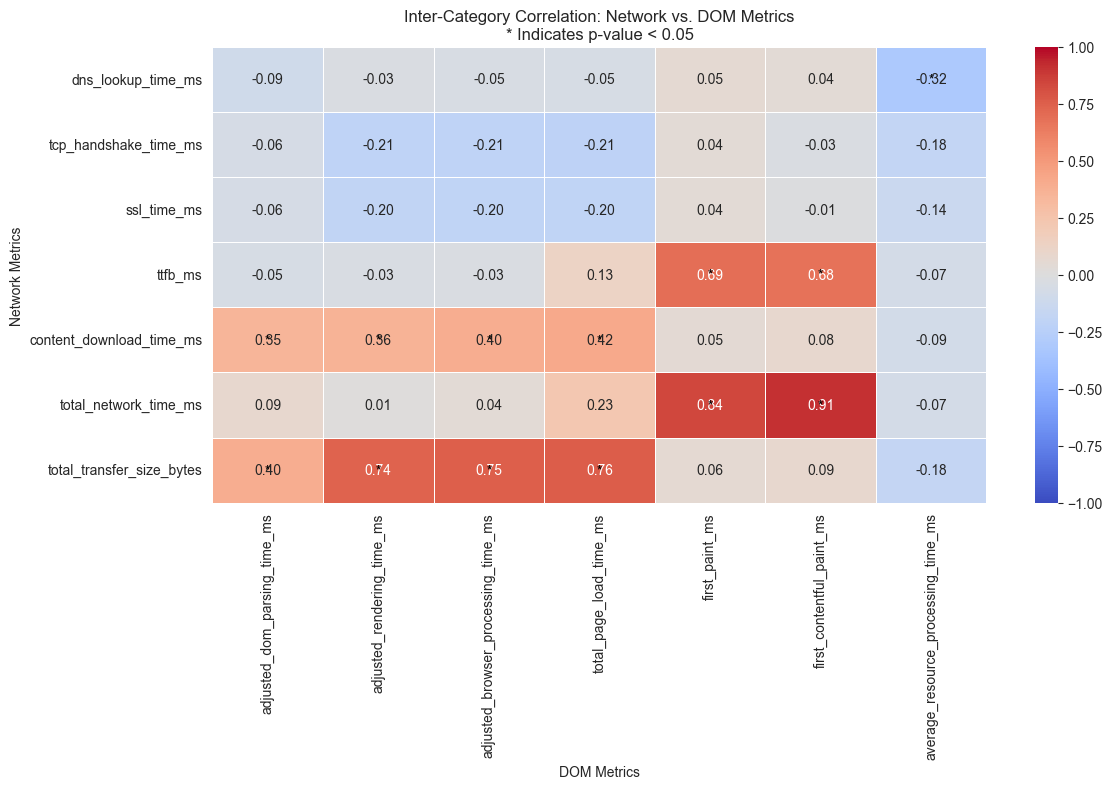

In [34]:
# Calculate correlation matrix between network and DOM metrics
inter_corr = df_cleaned[network_metrics + dom_metrics].corr().loc[network_metrics, dom_metrics]

# Function to calculate p-values
def calculate_pvalues(df, network_metrics, dom_metrics):
    pvalues = pd.DataFrame(index=network_metrics, columns=dom_metrics)
    for row in network_metrics:
        for col in dom_metrics:
            if df[row].dropna().shape[0] > 2:  # Ensure enough data points
                corr_coef, p_val = pearsonr(df[row], df[col])
                pvalues.loc[row, col] = p_val
            else:
                pvalues.loc[row, col] = np.nan
    return pvalues.astype(float)

# Calculate p-values
inter_pvalues = calculate_pvalues(df_cleaned, network_metrics, dom_metrics)

# Plot Inter-Category Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(inter_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(inter_corr.shape[0]):
    for j in range(inter_corr.shape[1]):
        p_val = inter_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Inter-Category Correlation: Network vs. DOM Metrics\n* Indicates p-value < 0.05')
plt.xlabel('DOM Metrics')
plt.ylabel('Network Metrics')
plt.tight_layout()
plt.show()


Explanation:

    Correlation Matrix (inter_corr): Shows the Pearson correlation coefficients between each network and DOM metric.
    P-Values (inter_pvalues): Indicates the statistical significance of each correlation. A common threshold is p < 0.05.
    Heatmap Visualization:
        Colors: Represent the strength and direction of the correlation.
        Annotations: Display the correlation coefficient.
        Asterisks (*): Indicate statistically significant correlations (p < 0.05).

Interpretation:

    Near-Zero Correlations: Suggest successful isolation between network and DOM metrics.
    Significant Correlations: May indicate residual influences or measurement inaccuracies.

### 2. Intra-Category Correlation Heatmaps

These heatmaps help understand relationships within the same category of metrics.

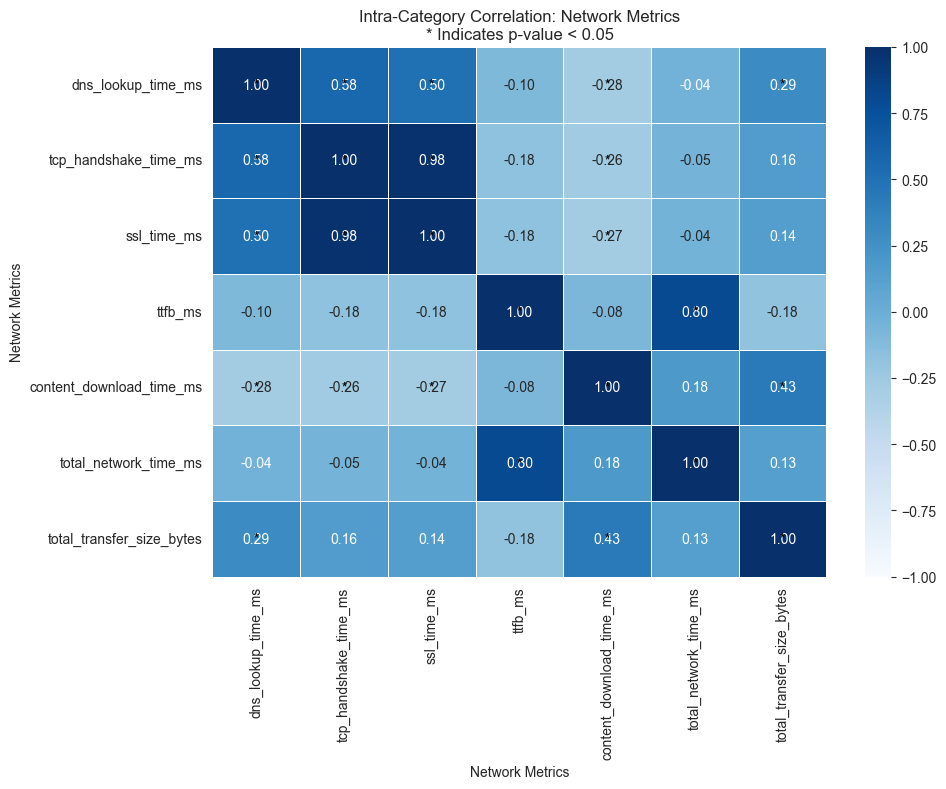

In [35]:
# Calculate correlation matrix for network metrics
network_corr = df_cleaned[network_metrics].corr()

# Function to calculate p-values for network metrics
network_pvalues = calculate_pvalues(df_cleaned, network_metrics, network_metrics)

# Plot Network Metrics Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(network_corr, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(network_corr.shape[0]):
    for j in range(network_corr.shape[1]):
        p_val = network_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Intra-Category Correlation: Network Metrics\n* Indicates p-value < 0.05')
plt.xlabel('Network Metrics')
plt.ylabel('Network Metrics')
plt.tight_layout()
plt.show()


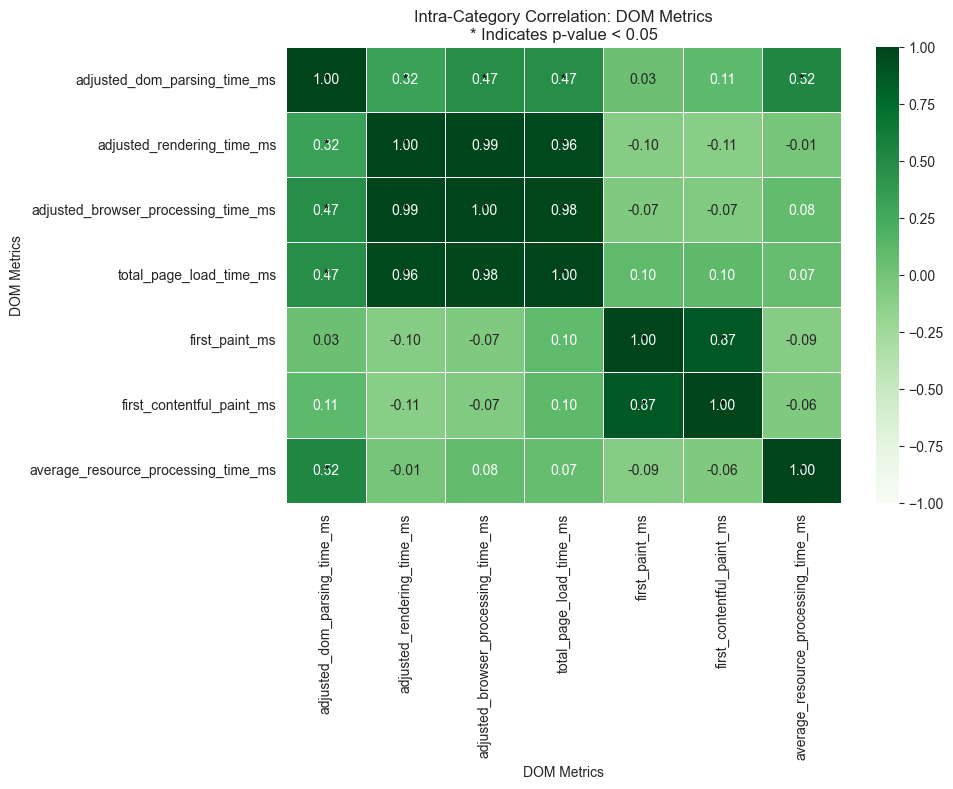

In [36]:
# Calculate correlation matrix for DOM metrics
dom_corr = df_cleaned[dom_metrics].corr()

# Function to calculate p-values for DOM metrics
dom_pvalues = calculate_pvalues(df_cleaned, dom_metrics, dom_metrics)

# Plot DOM Metrics Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dom_corr, annot=True, fmt=".2f", cmap='Greens', vmin=-1, vmax=1, 
            annot_kws={"size": 10}, linewidths=.5)

# Overlay p-values
for i in range(dom_corr.shape[0]):
    for j in range(dom_corr.shape[1]):
        p_val = dom_pvalues.iloc[i, j]
        if p_val < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', color='black', ha='center', va='center')

plt.title('Intra-Category Correlation: DOM Metrics\n* Indicates p-value < 0.05')
plt.xlabel('DOM Metrics')
plt.ylabel('DOM Metrics')
plt.tight_layout()
plt.show()


Explanation:

    Network/Intra-Category Correlation Matrix (network_corr / dom_corr): Shows Pearson correlation coefficients within the same category.
    P-Values (network_pvalues / dom_pvalues): Indicates the statistical significance of each intra-category correlation.
    Heatmap Visualization:
        Colors: Represent the strength and direction of the correlation.
        Annotations: Display the correlation coefficient.
        Asterisks (*): Indicate statistically significant correlations (p < 0.05).

Interpretation:

    High Correlation Within Categories: May reveal interdependencies, such as DNS Lookup Time correlating with TCP Handshake Time.
    Low Correlation: Suggests metrics are measuring distinct performance aspects without redundancy.

## Exploratory Data Analysis (EDA)

We will explore the data through descriptive statistics and visualizations to uncover patterns and insights.


### Descriptive Statistics

Let's compute descriptive statistics for the performance metrics.


In [37]:
# Compute descriptive statistics grouped by browser
df.groupby('browser')[numeric_columns].describe().T


browser                                Chrome       Firefox
total_page_load_time_ms   count  4.000000e+01  2.000000e+01
                          mean   2.194275e+03  2.222100e+03
                          std    1.967092e+03  1.797019e+03
                          min    5.500000e+02  4.870000e+02
                          25%    1.165000e+03  1.428000e+03
...                                       ...           ...
total_transfer_size_bytes min    0.000000e+00  0.000000e+00
                          25%    0.000000e+00  2.421000e+03
                          50%    2.378575e+05  2.731345e+05
                          75%    7.360242e+05  5.441098e+05
                          max    1.791140e+06  1.762218e+06

[112 rows x 2 columns]

### Visualizations

We will create various plots to visualize and compare the performance metrics across browsers.


### Line Plots for Key Metrics Over Time

These plots show how each performance metric changes over time for both browsers.


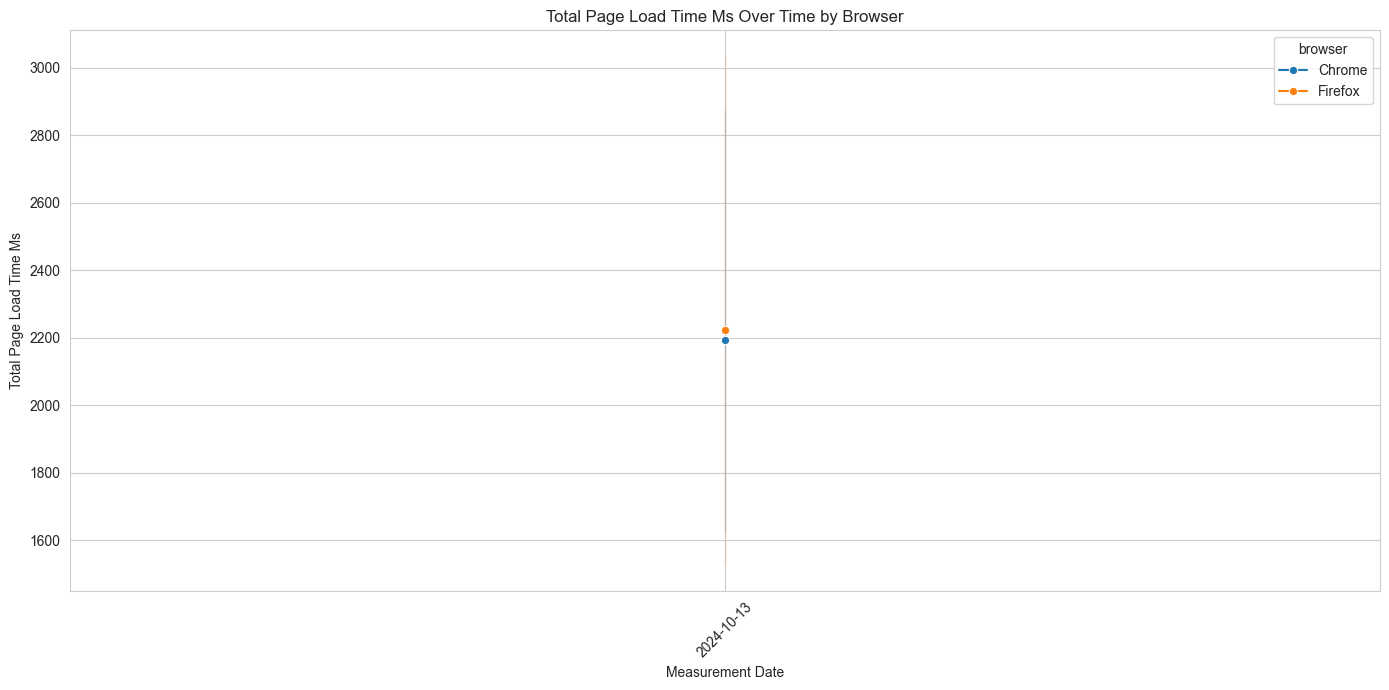

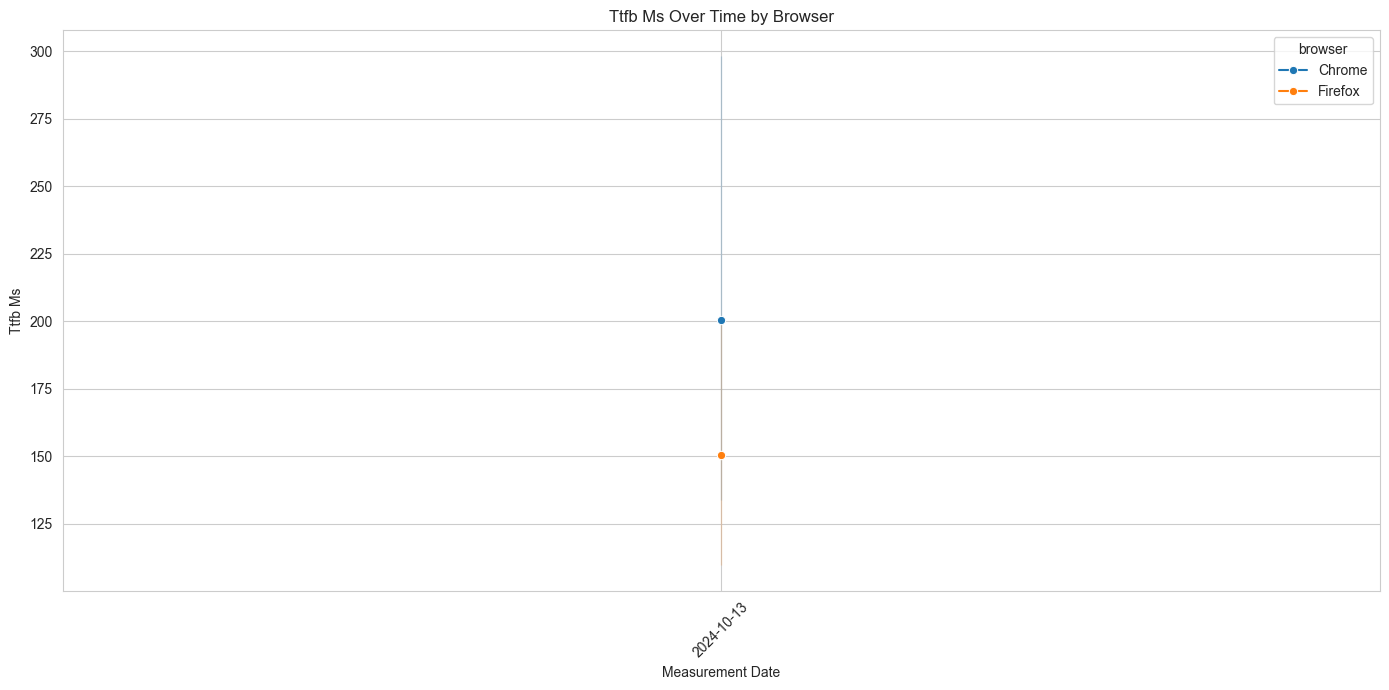

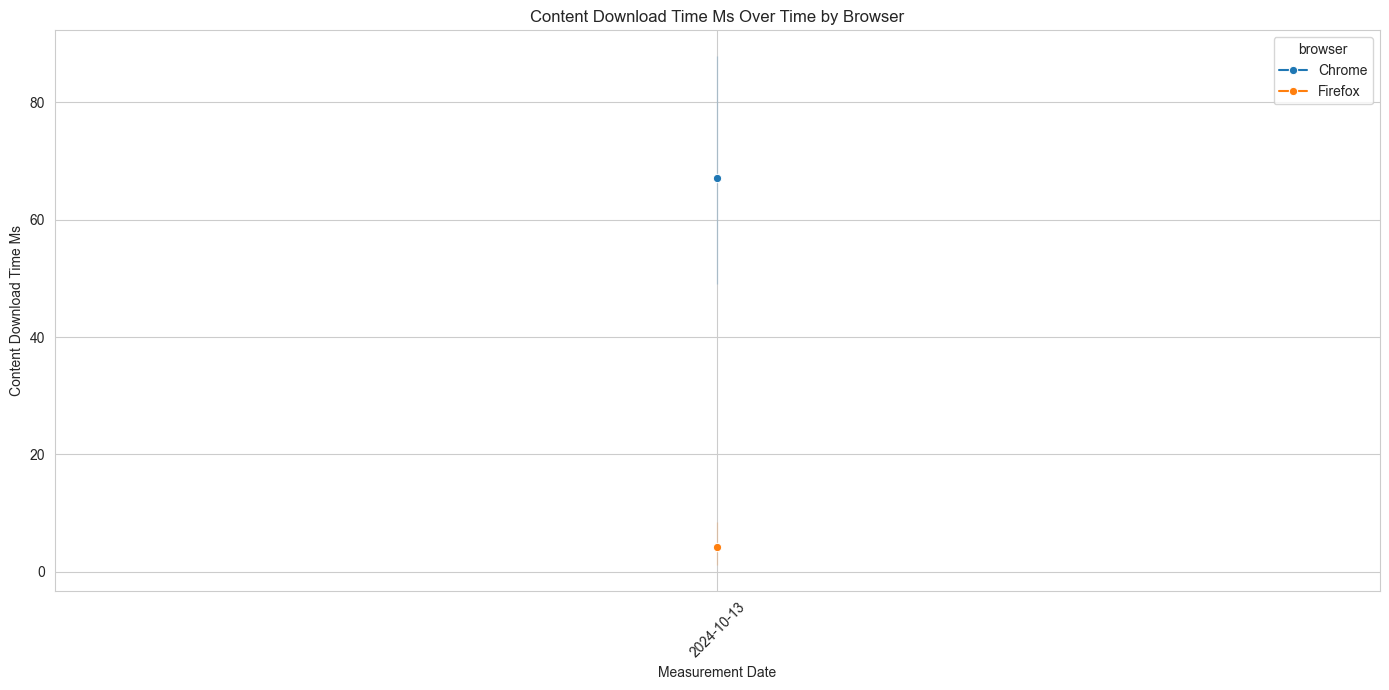

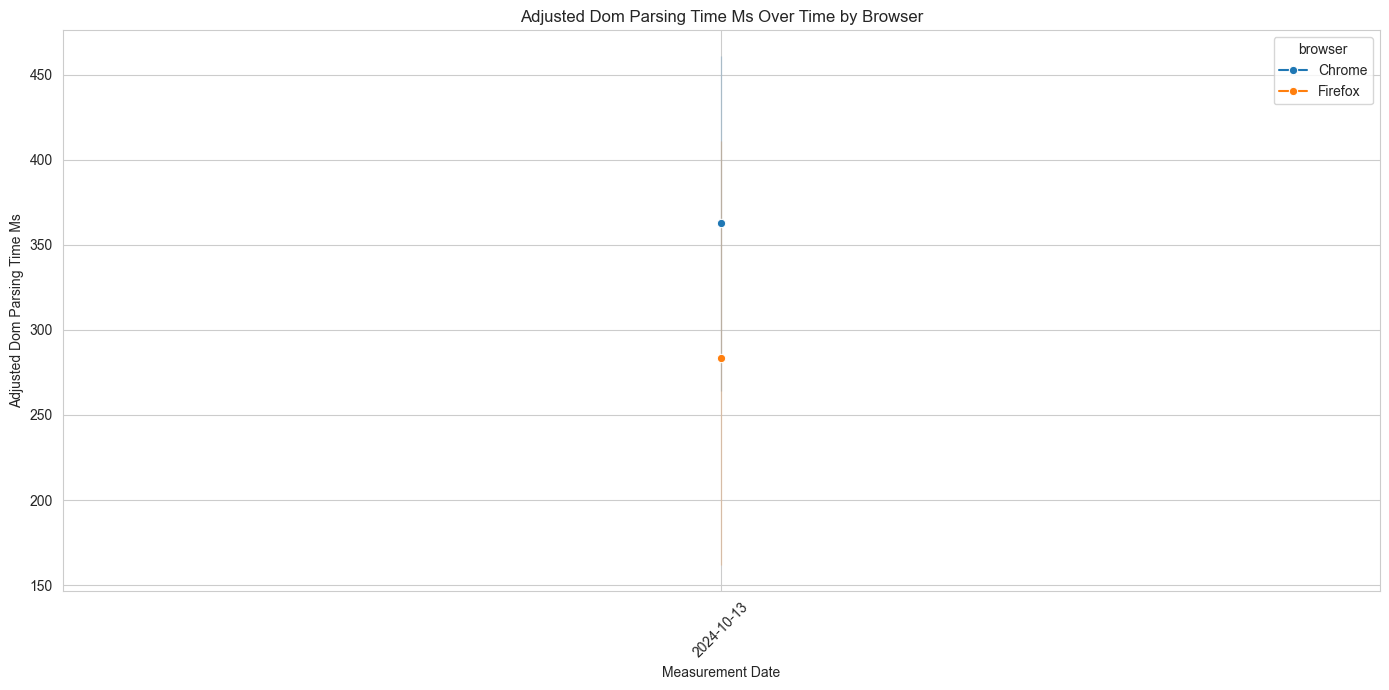

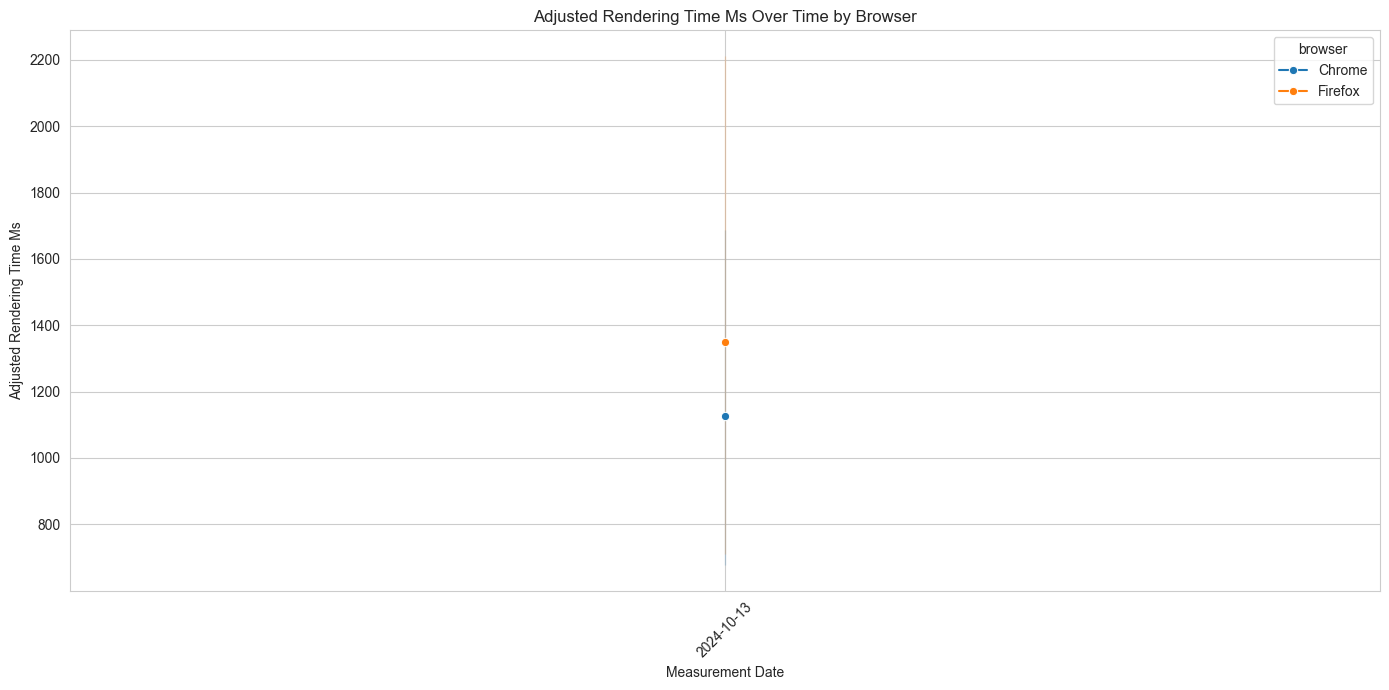

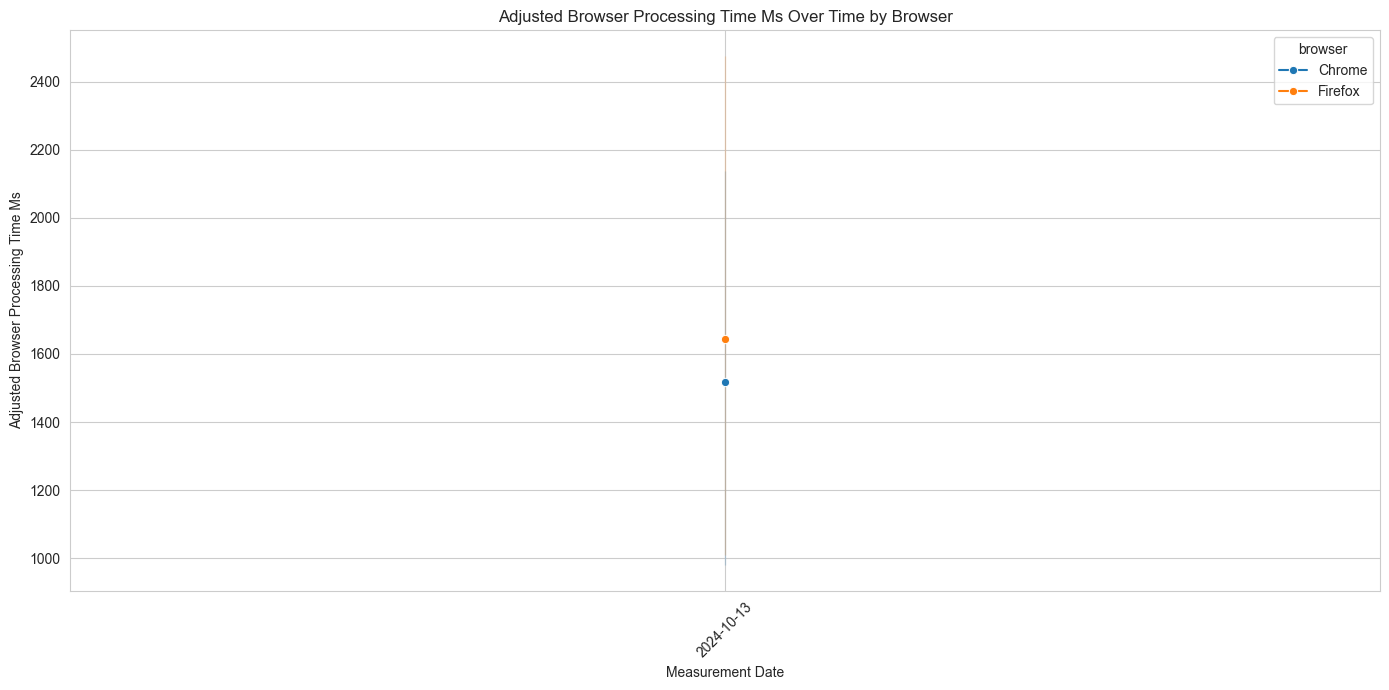

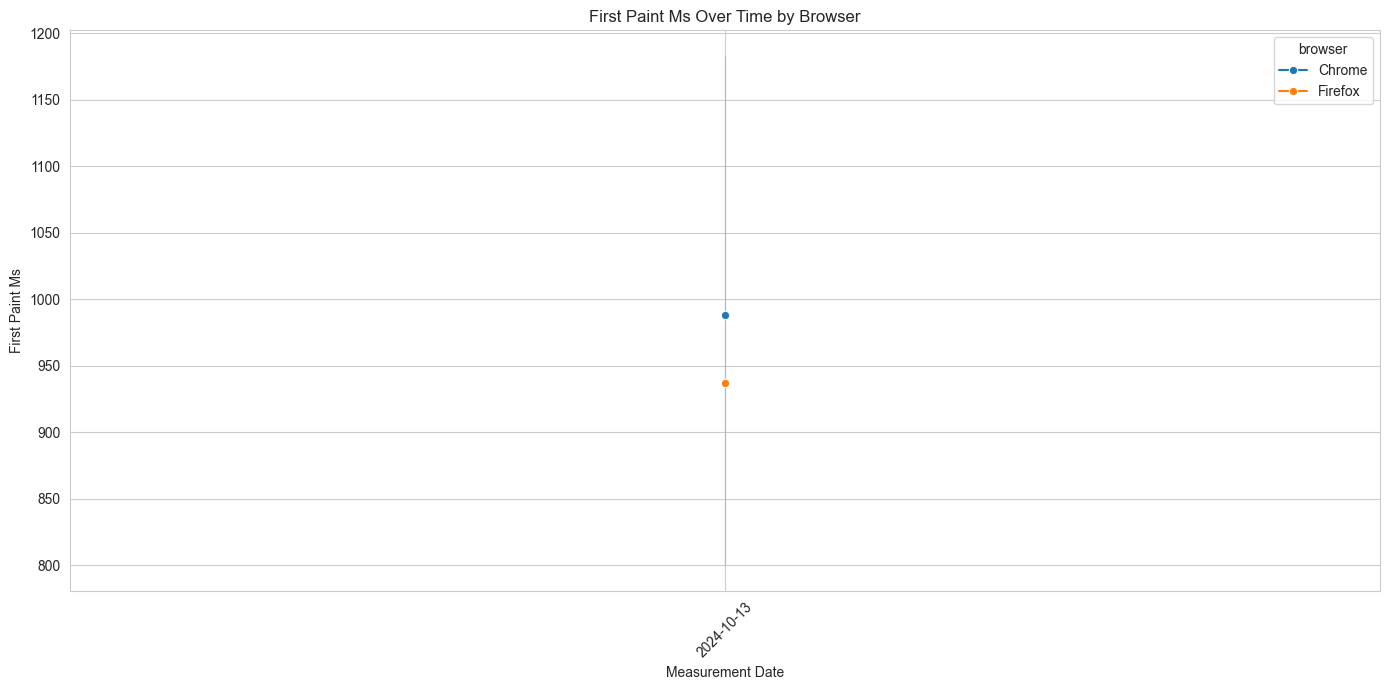

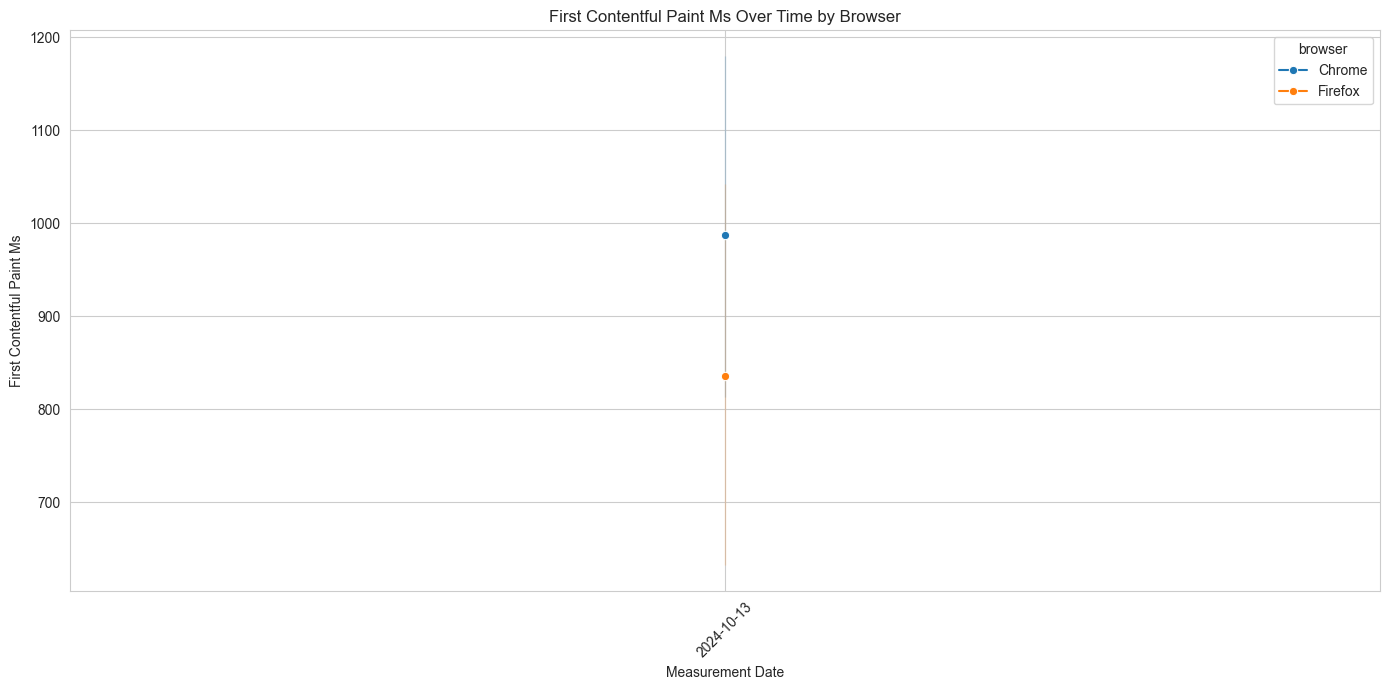

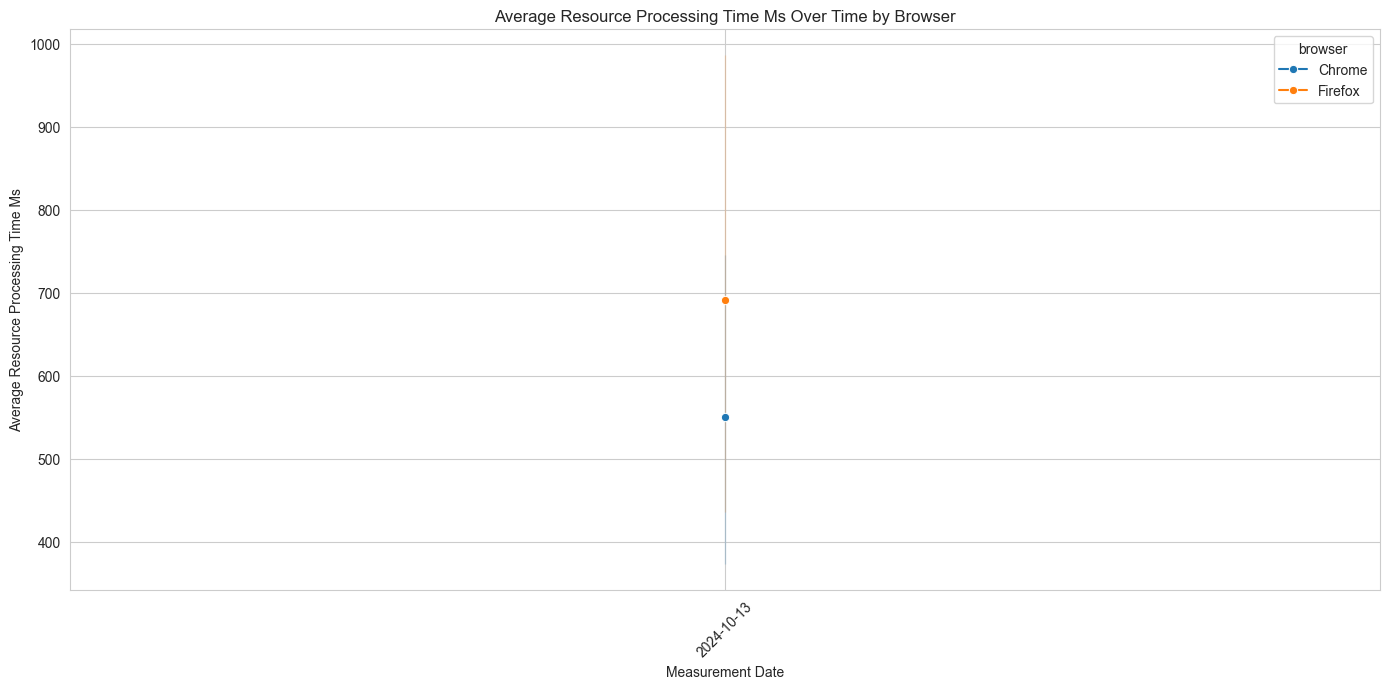

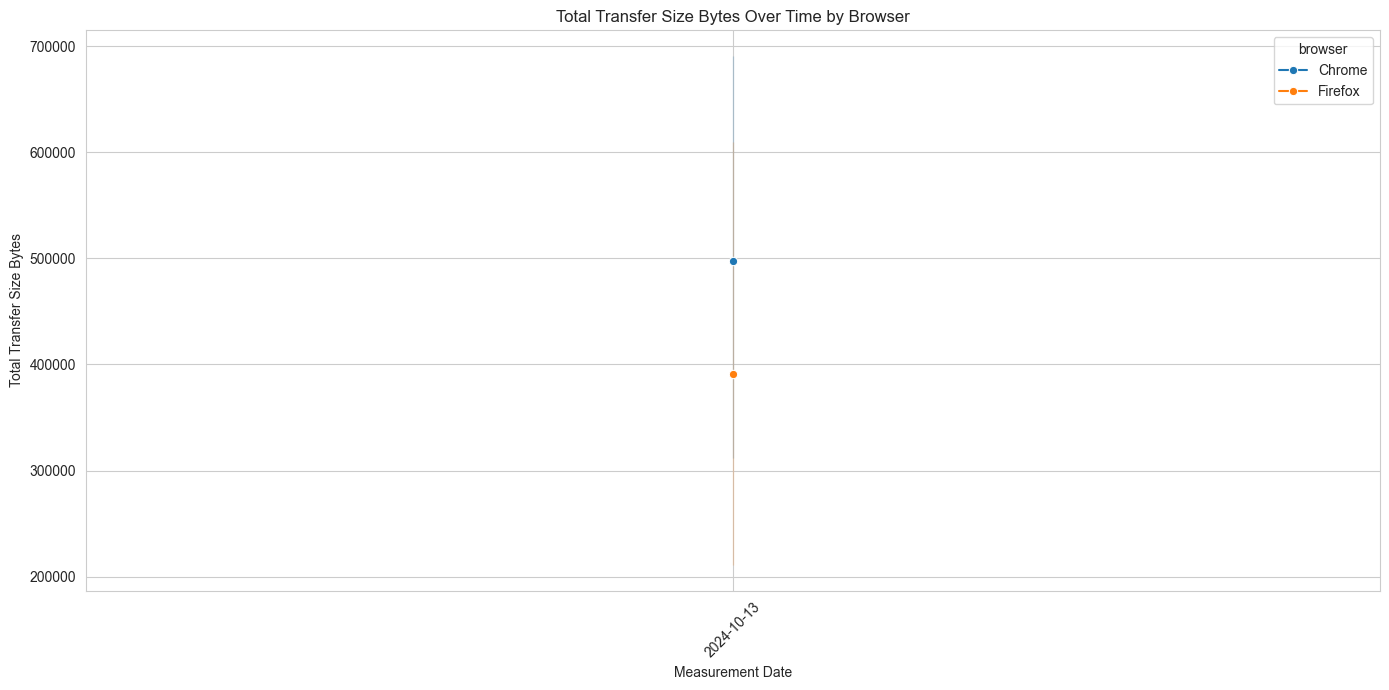

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# List of metrics to plot
metrics = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'average_resource_processing_time_ms',
    'total_transfer_size_bytes',
]

# Plot each metric over time
for metric in metrics:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_historical, x='measurement_date', y=metric, hue='browser', marker='o')
    plt.title(f'{metric.replace("_", " ").title()} Over Time by Browser')
    plt.xlabel('Measurement Date')
    plt.ylabel(f'{metric.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Rolling Averages to Smooth Trends

Applying rolling averages helps in visualizing underlying trends by smoothing out short-term fluctuations.


In [40]:
# Requires historical data for more than one day, which is a different workflow (WIP)
# Define window size for rolling average (e.g., 3 measurements)
# window_size = 3

# for metric in metrics:
#     plt.figure(figsize=(14, 7))
#     sns.lineplot(data=df_historical, x='measurement_date', y=metric, hue='browser', marker='o', label='Original')
    
#     # Calculate rolling average
#     df_historical[f'{metric}_rolling'] = df_historical.groupby('browser')[metric].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    
#     # Plot rolling average
#     sns.lineplot(data=df_historical, x='measurement_date', y=f'{metric}_rolling', hue='browser', marker='o', linestyle='--', legend=False, label='Rolling Average')
    
#     plt.title(f'{metric.replace("_", " ").title()} Over Time by Browser with Rolling Average')
#     plt.xlabel('Measurement Date')
#     plt.ylabel(f'{metric.replace("_", " ").title()}')
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


### Correlation Heatmap

This heatmap displays the correlations between different performance metrics.


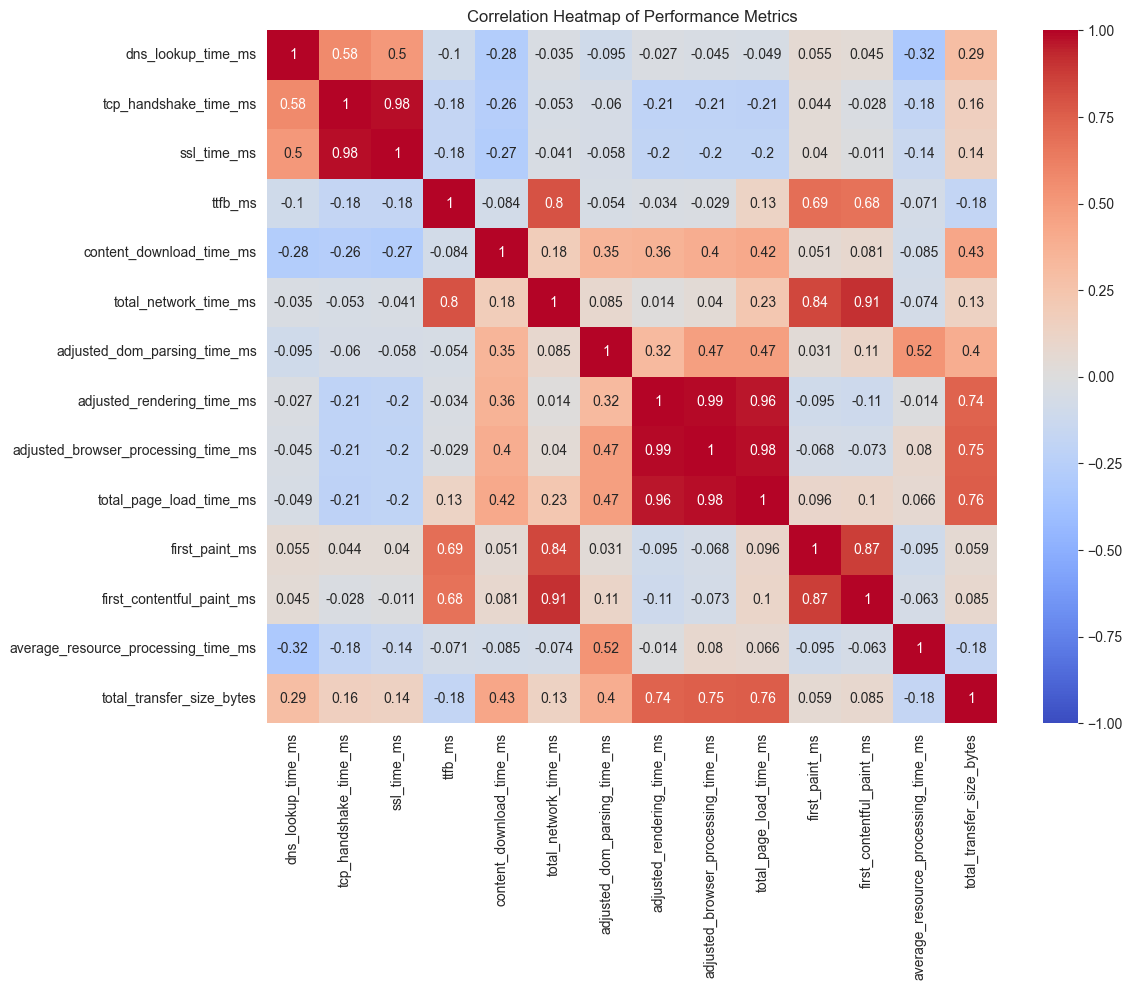

In [41]:
# Select numeric columns
numeric_cols = df_historical.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = df_historical[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Performance Metrics')
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import os

# Define the path to the master historical CSV
master_historical_csv = "../data/historical/historical_performance_metrics.csv"

# Load the master historical data
if os.path.isfile(master_historical_csv):
    df_master_historical = pd.read_csv(master_historical_csv)
    display(df_master_historical.head())
    print(df_master_historical['browser'].unique())  # Should show both Chrome and Firefox
else:
    print(f"Master historical CSV file not found at {master_historical_csv}.")


,website,dns_lookup_time_ms,tcp_handshake_time_ms,ssl_time_ms,ttfb_ms,content_download_time_ms,total_network_time_ms,measurement_date,adjusted_dom_parsing_time_ms,adjusted_rendering_time_ms,adjusted_browser_processing_time_ms,total_page_load_time_ms,first_paint_ms,first_contentful_paint_ms,average_resource_processing_time_ms,total_transfer_size_bytes,browser,status
0,googletagmanager.com,0.0,0.0,0.0,73.6,2.6,272.9,2024-10-13,36,286,336,609,368.8,368.8,607.000000,0,Chrome,SUCCESS
1,youtube.com,0.0,0.0,0.0,123.1,77.4,1101.9,2024-10-13,695,691,1466,2568,1857.9,1891.3,1549.730233,736034,Chrome,SUCCESS
2,facebook.com,0.0,0.0,0.0,304.3,33.2,775.8,2024-10-13,605,314,924,1699,1482.6,1482.6,92.424324,340584,Chrome,SUCCESS
3,ajax.googleapis.com,0.0,0.0,0.0,227.7,28.3,262.8,2024-10-13,84,433,665,928,899.6,899.6,81.725000,112922,Chrome,SUCCESS
4,fonts.googleapis.com,0.0,0.0,0.0,72.2,3.0,269.8,2024-10-13,23,288,318,587,397.8,397.8,585.900000,0,Chrome,SUCCESS


['Chrome' 'Firefox']


#### Comparative Box Plots

Box plots allow us to compare the distribution of metrics across browsers.


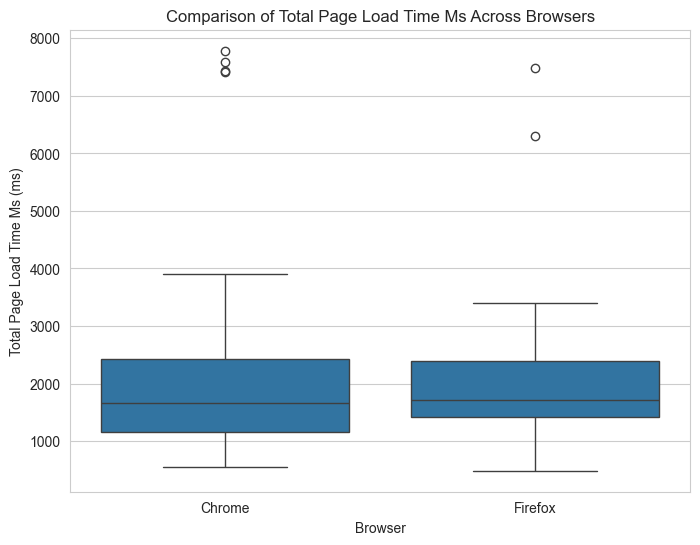

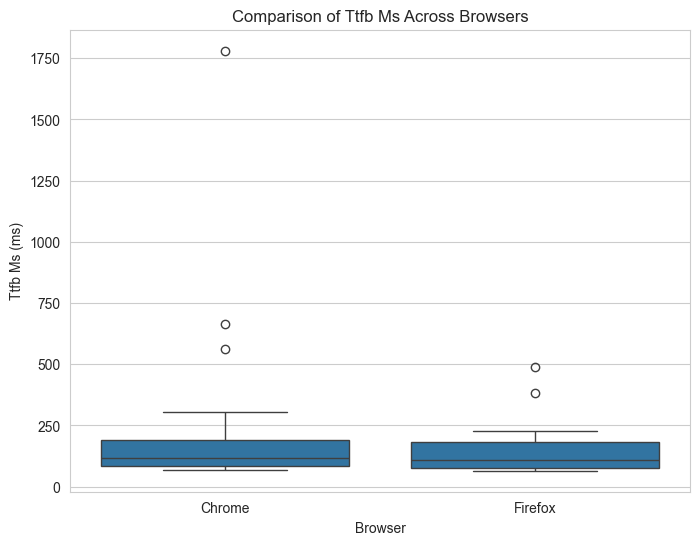

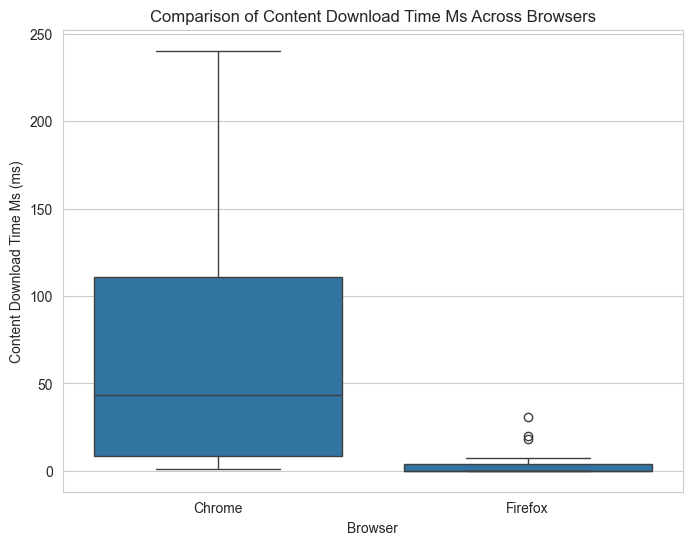

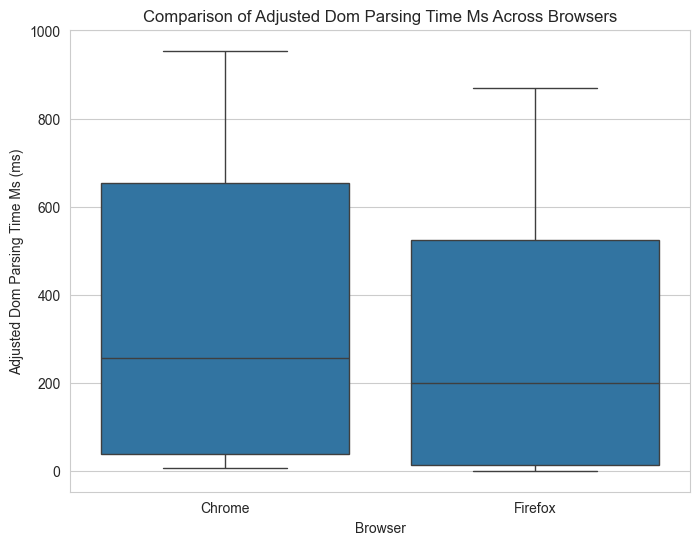

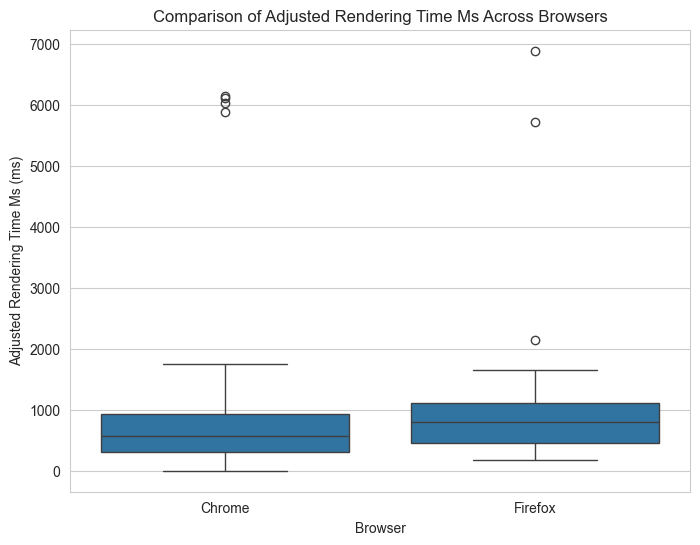

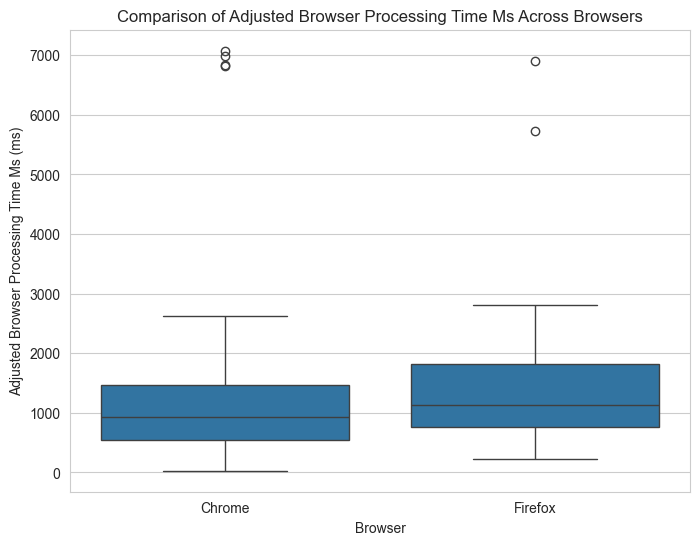

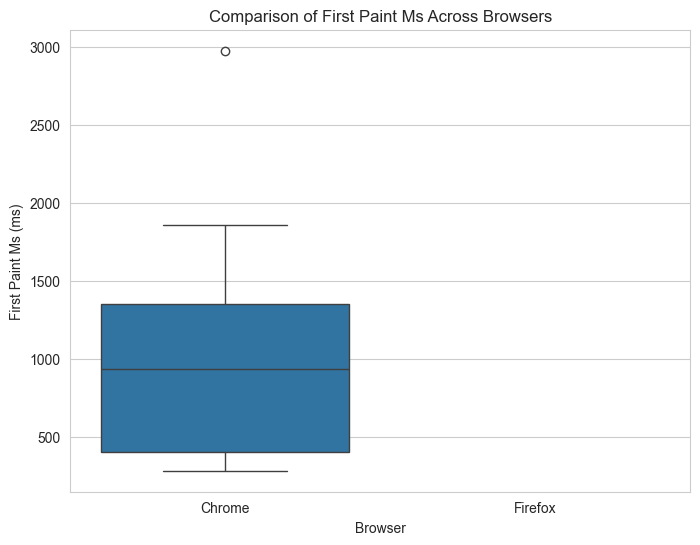

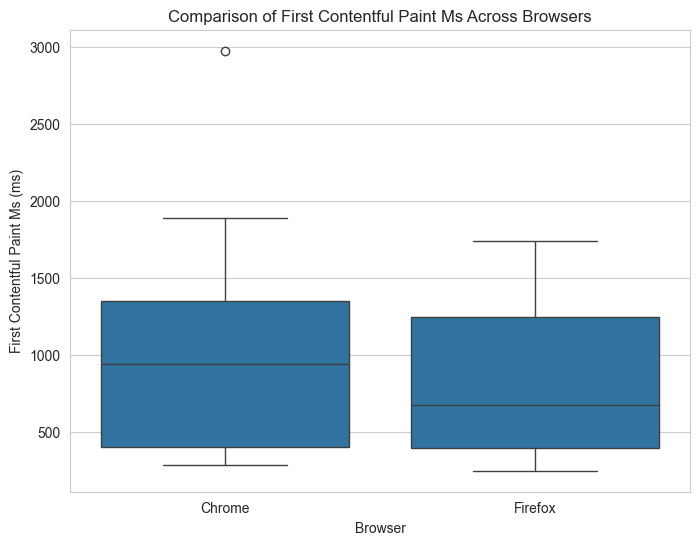

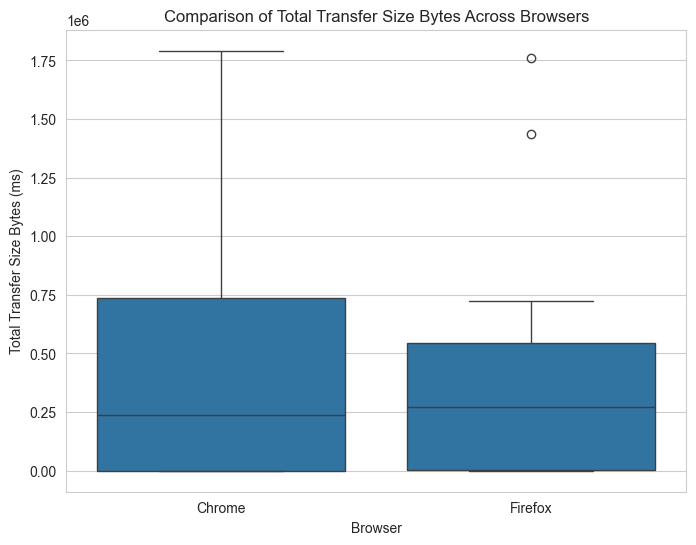

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# List of metrics to plot
metrics = [
    'total_page_load_time_ms',
    'ttfb_ms',
    'content_download_time_ms',
    'adjusted_dom_parsing_time_ms',
    'adjusted_rendering_time_ms',
    'adjusted_browser_processing_time_ms',
    'first_paint_ms',
    'first_contentful_paint_ms',
    'total_transfer_size_bytes',
]

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='browser', y=metric)
    plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Browsers')
    plt.xlabel('Browser')
    plt.ylabel(f'{metric.replace("_", " ").title()} (ms)')
    plt.show()


#### Violin Plots

Violin plots show the distribution of the data and can highlight differences in the density of the metrics.


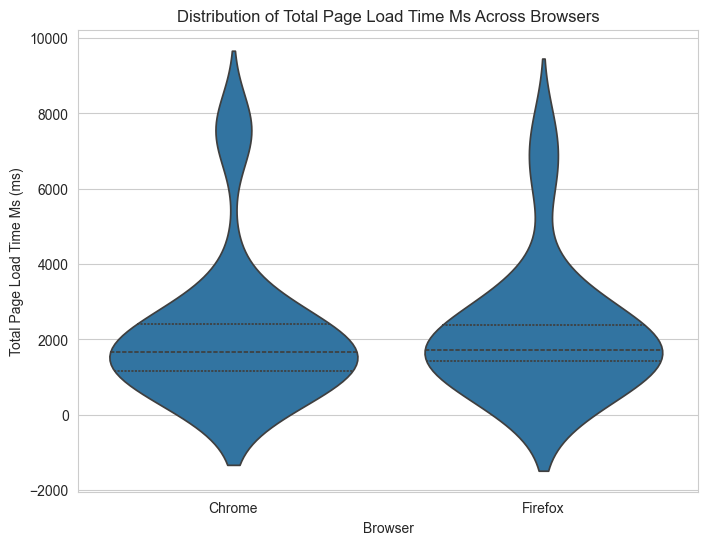

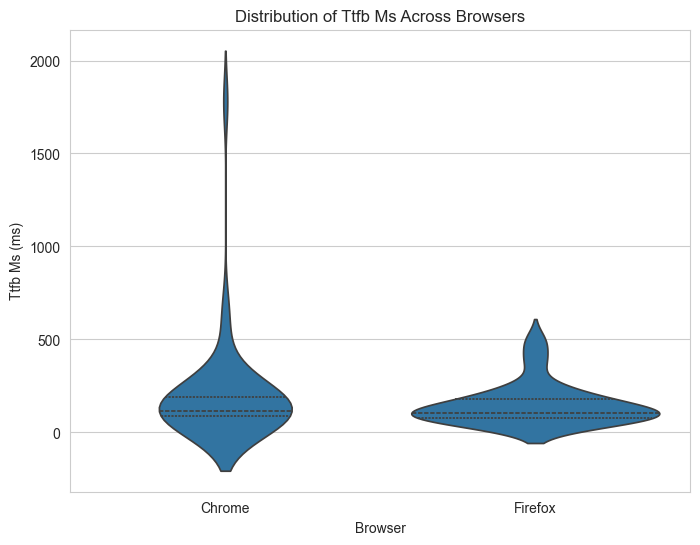

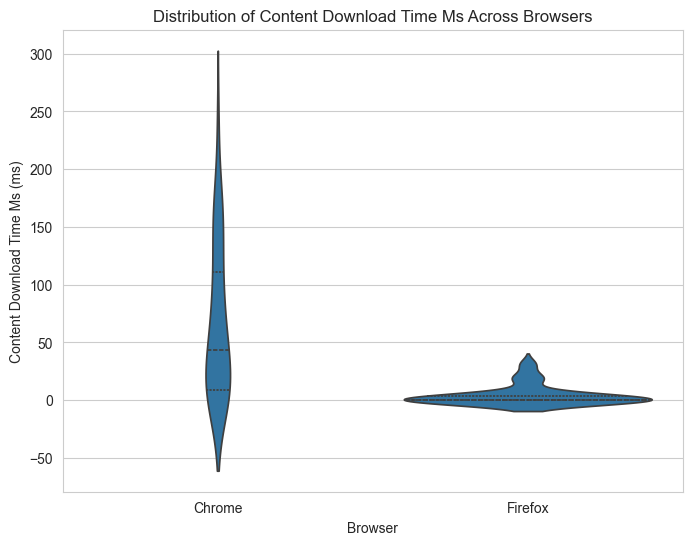

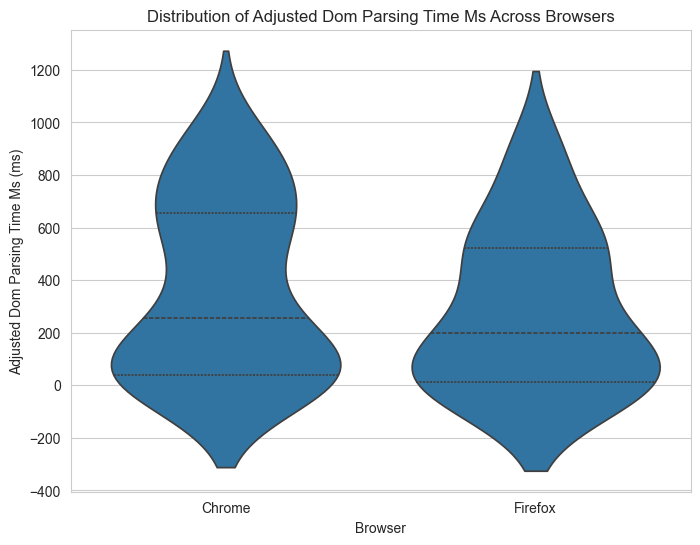

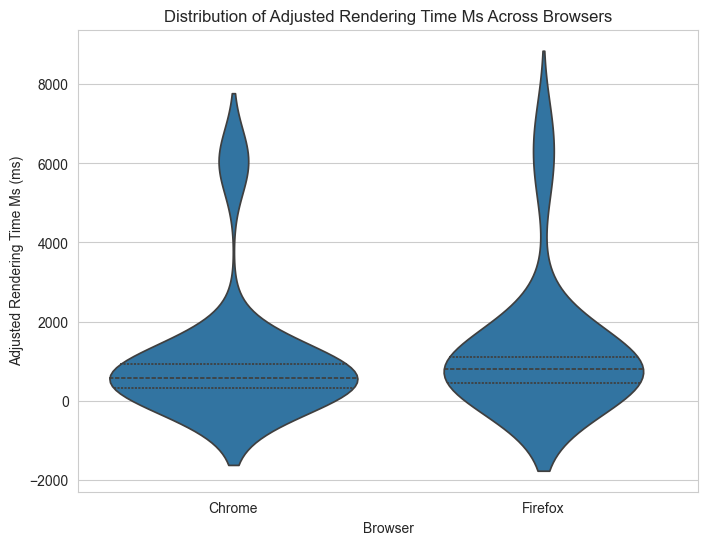

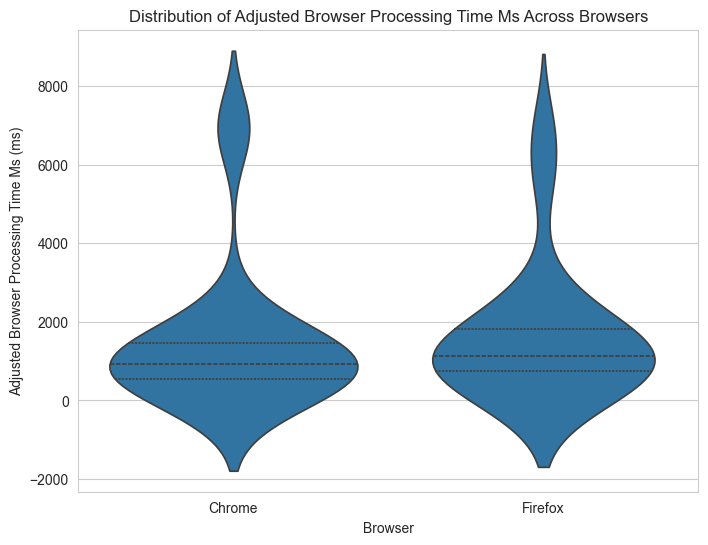

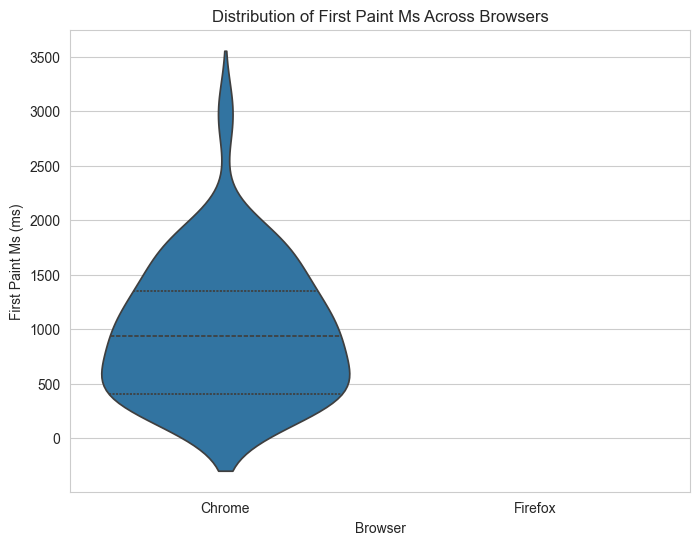

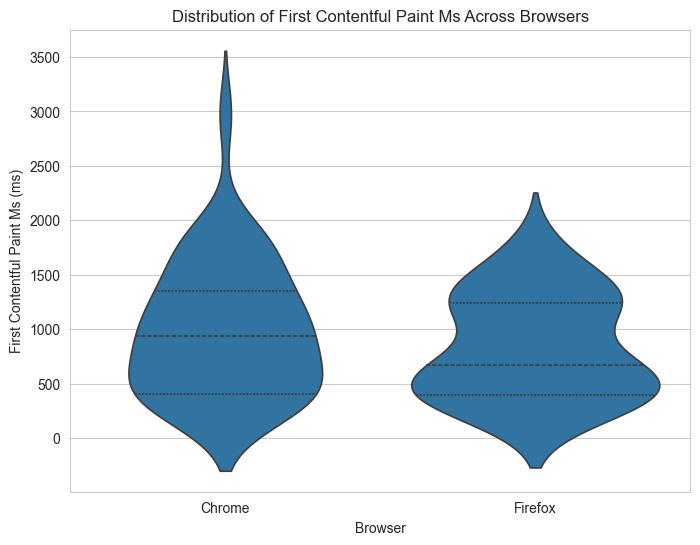

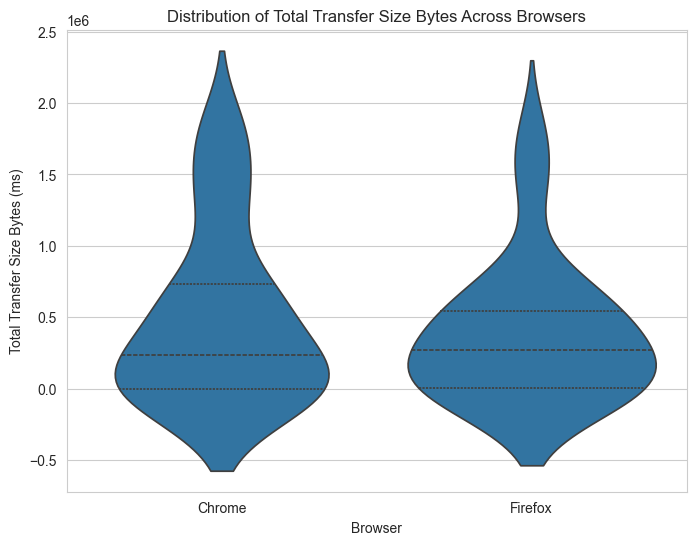

In [44]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='browser', y=metric, inner='quartile')
    plt.title(f'Distribution of {metric.replace("_", " ").title()} Across Browsers')
    plt.xlabel('Browser')
    plt.ylabel(f'{metric.replace("_", " ").title()} (ms)')
    plt.show()



#### Grouped Bar Charts for Top Websites

We will compare performance metrics for the top 10 websites based on average total page load time.


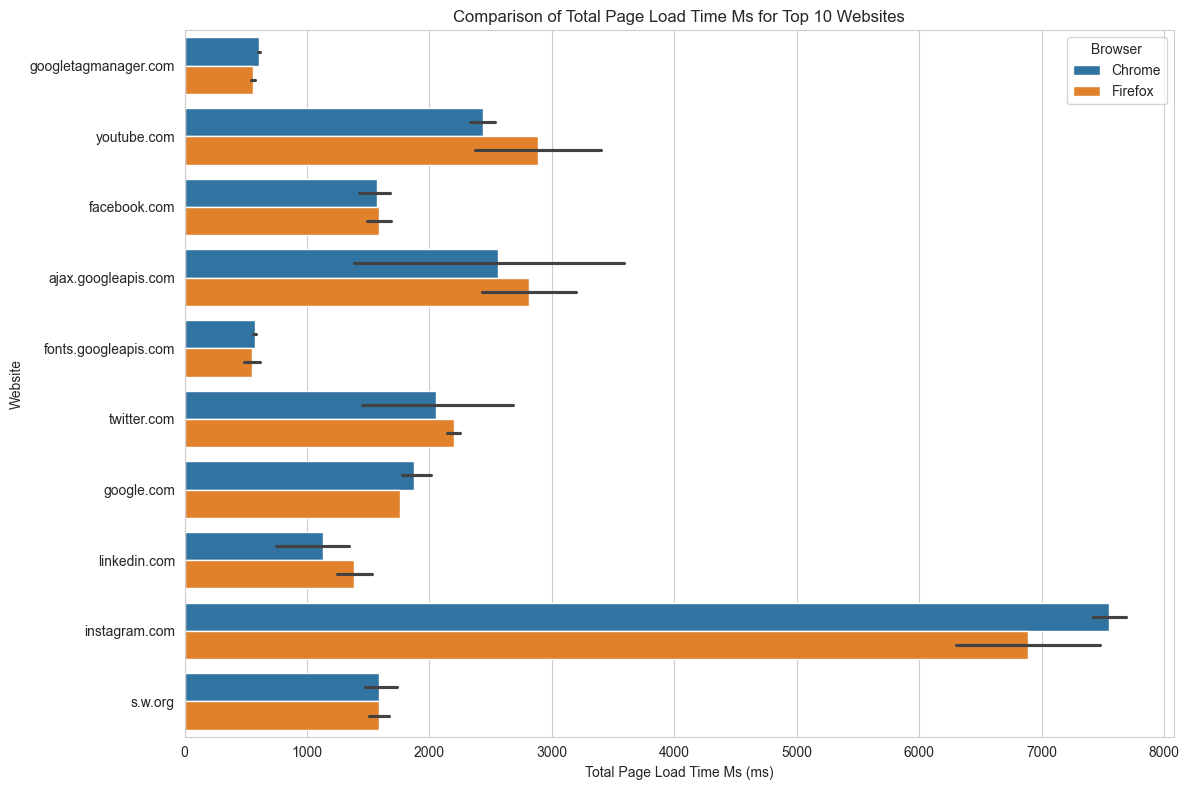

In [45]:
# Choose a metric
metric = 'total_page_load_time_ms'

# Get top N websites based on average metric
top_n = 10
top_sites = (
    df.groupby('website')[metric]
    .mean()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)

df_top_sites = df[df['website'].isin(top_sites)]

plt.figure(figsize=(12, 8))
sns.barplot(
    x=metric,
    y='website',
    hue='browser',
    data=df_top_sites,
    orient='h'
)
plt.title(f'Comparison of {metric.replace("_", " ").title()} for Top {top_n} Websites')
plt.xlabel(f'{metric.replace("_", " ").title()} (ms)')
plt.ylabel('Website')
plt.legend(title='Browser')
plt.tight_layout()
plt.show()


#### Performance Difference Between Browsers

We will calculate and visualize the difference in performance metrics between Chrome and Firefox for each website.


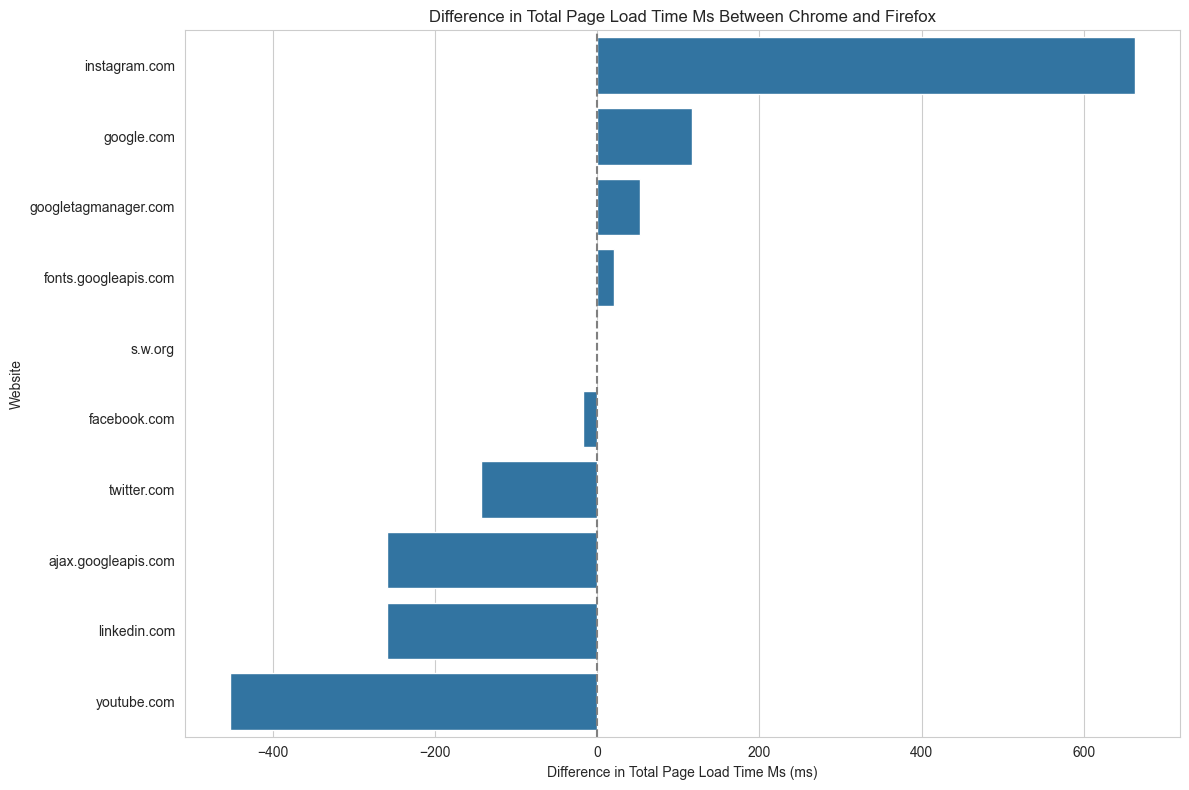

In [46]:
# Pivot the DataFrame
df_pivot = df.pivot_table(
    index='website',
    columns='browser',
    values=metric
).dropna()

# Check if we have exactly two browsers
if len(df['browser'].unique()) == 2:
    browsers = df['browser'].unique()
    browser_a, browser_b = browsers
    df_pivot['difference'] = df_pivot[browser_a] - df_pivot[browser_b]
    
    # Sort by difference
    df_pivot_sorted = df_pivot.sort_values('difference', ascending=False)
    
    # Plot the differences
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='difference',
        y=df_pivot_sorted.index,
        data=df_pivot_sorted.reset_index(),
        orient='h'
    )
    plt.title(f'Difference in {metric.replace("_", " ").title()} Between {browser_a} and {browser_b}')
    plt.xlabel(f'Difference in {metric.replace("_", " ").title()} (ms)')
    plt.ylabel('Website')
    plt.axvline(0, color='grey', linestyle='--')
    plt.tight_layout()
    plt.show()
else:
    print("Performance difference plot requires exactly two browsers.")


#### Correlation Heatmap

A correlation heatmap helps us understand the relationships between different performance metrics.


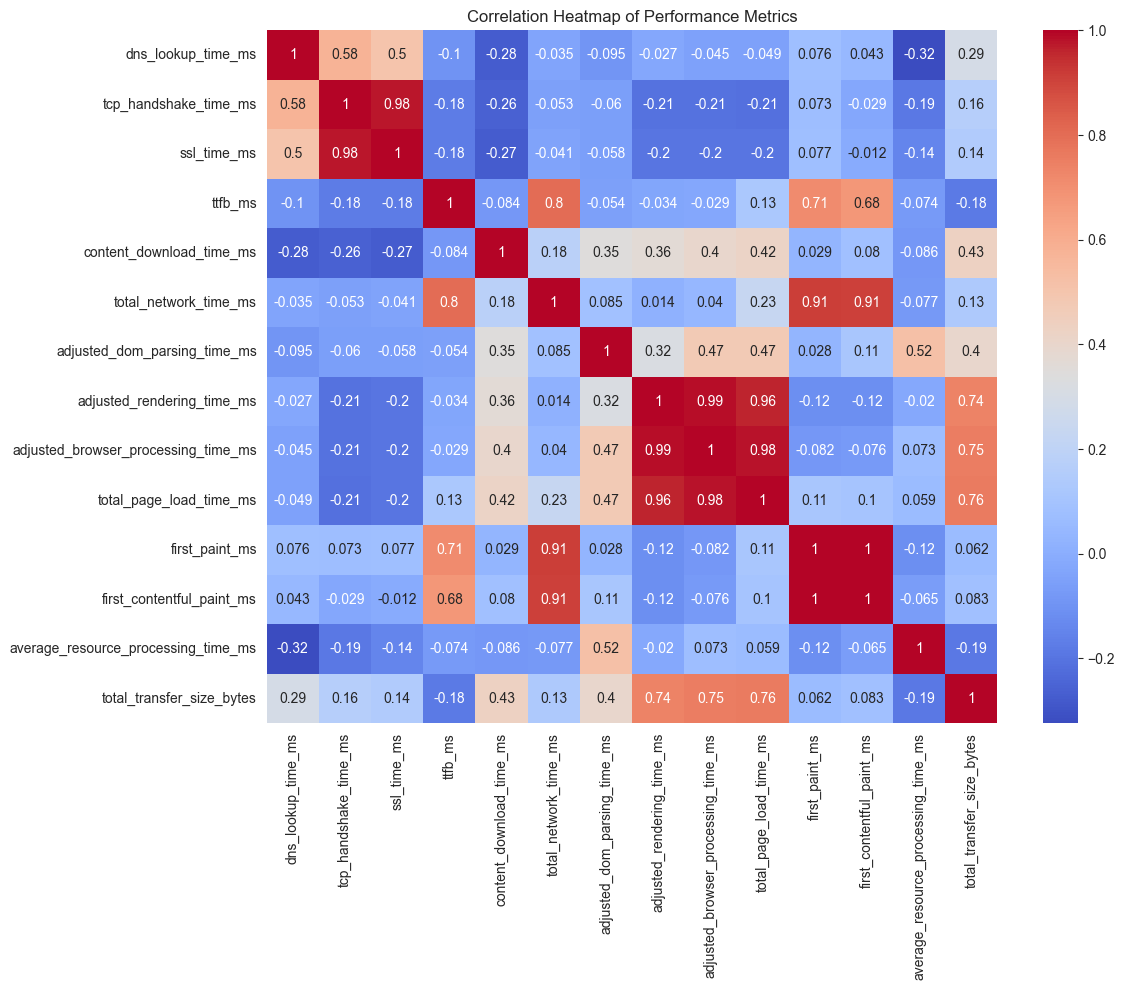

In [47]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Performance Metrics')
plt.tight_layout()
plt.show()


#### Scatter Plots with Regression Lines

We will examine the relationship between total transfer size and adjusted browser processing time.


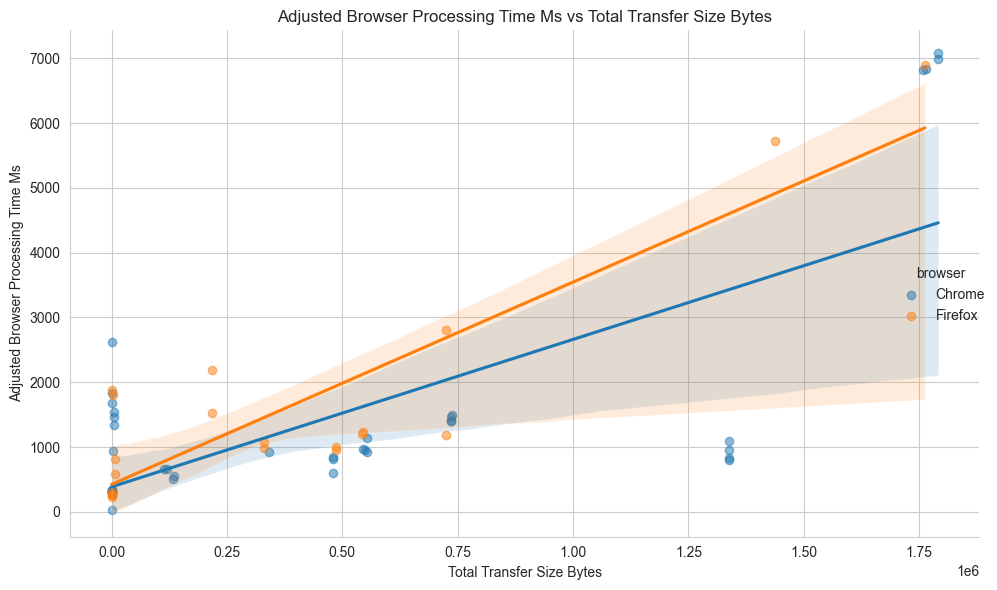

In [48]:
x_metric = 'total_transfer_size_bytes'
y_metric = 'adjusted_browser_processing_time_ms'

sns.lmplot(
    data=df,
    x=x_metric,
    y=y_metric,
    hue='browser',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.5}
)
plt.title(f'{y_metric.replace("_", " ").title()} vs {x_metric.replace("_", " ").title()}')
plt.xlabel(f'{x_metric.replace("_", " ").title()}')
plt.ylabel(f'{y_metric.replace("_", " ").title()}')
plt.tight_layout()
plt.show()


## Conclusions and Next Steps

**Summary of Findings:**

- Based on the analysis, we observed that...

*(Add your interpretations and key takeaways here.)*

**Next Steps:**

- Investigate further into...
- Consider collecting additional data on...
- Share these findings with the team for feedback and action.

---

**Note:** This notebook provides an initial analysis of the browser performance data. For ongoing monitoring and more advanced analyses, consider integrating a database solution and automating the reporting process.
